# Step-wise comparison AoB2015
The results from Schymanski et al. (2015) are used as a benchmark and starting point from the current analysis. Several adjustmens have been made in the general set-up of the model, the effects of these choices are assessed in a stepwise approach:

0. Benchmark data
1. Reproducing benchmark results
2. Repeat SCE with input data AoB2015
3. Change the modelling period
4. Change atmospheric CO$_2$ to MaunaLoa records
5. Change soil layer thickness
6. Change atmospheric pressure from fixed to variable
7. Add rooting depth grasses as optimizable property
8. Change costfactor for water transport
9. Update the weatherdata with new SILO-data
10. New soil parameters and hydrology

The starting points are therefore the parameters and settings used by Schymanski et al. (2015). From there, one change is included at a time, to see the specific influence of this change. 


## Reproducing benchmark results
Here, the vegetation properties are not re-optimized and the outputs of the optimization of Schymanski et al. (2015) are used. Both model runs should therefore produce the same results.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook


<Figure size 1280x1520 with 0 Axes>

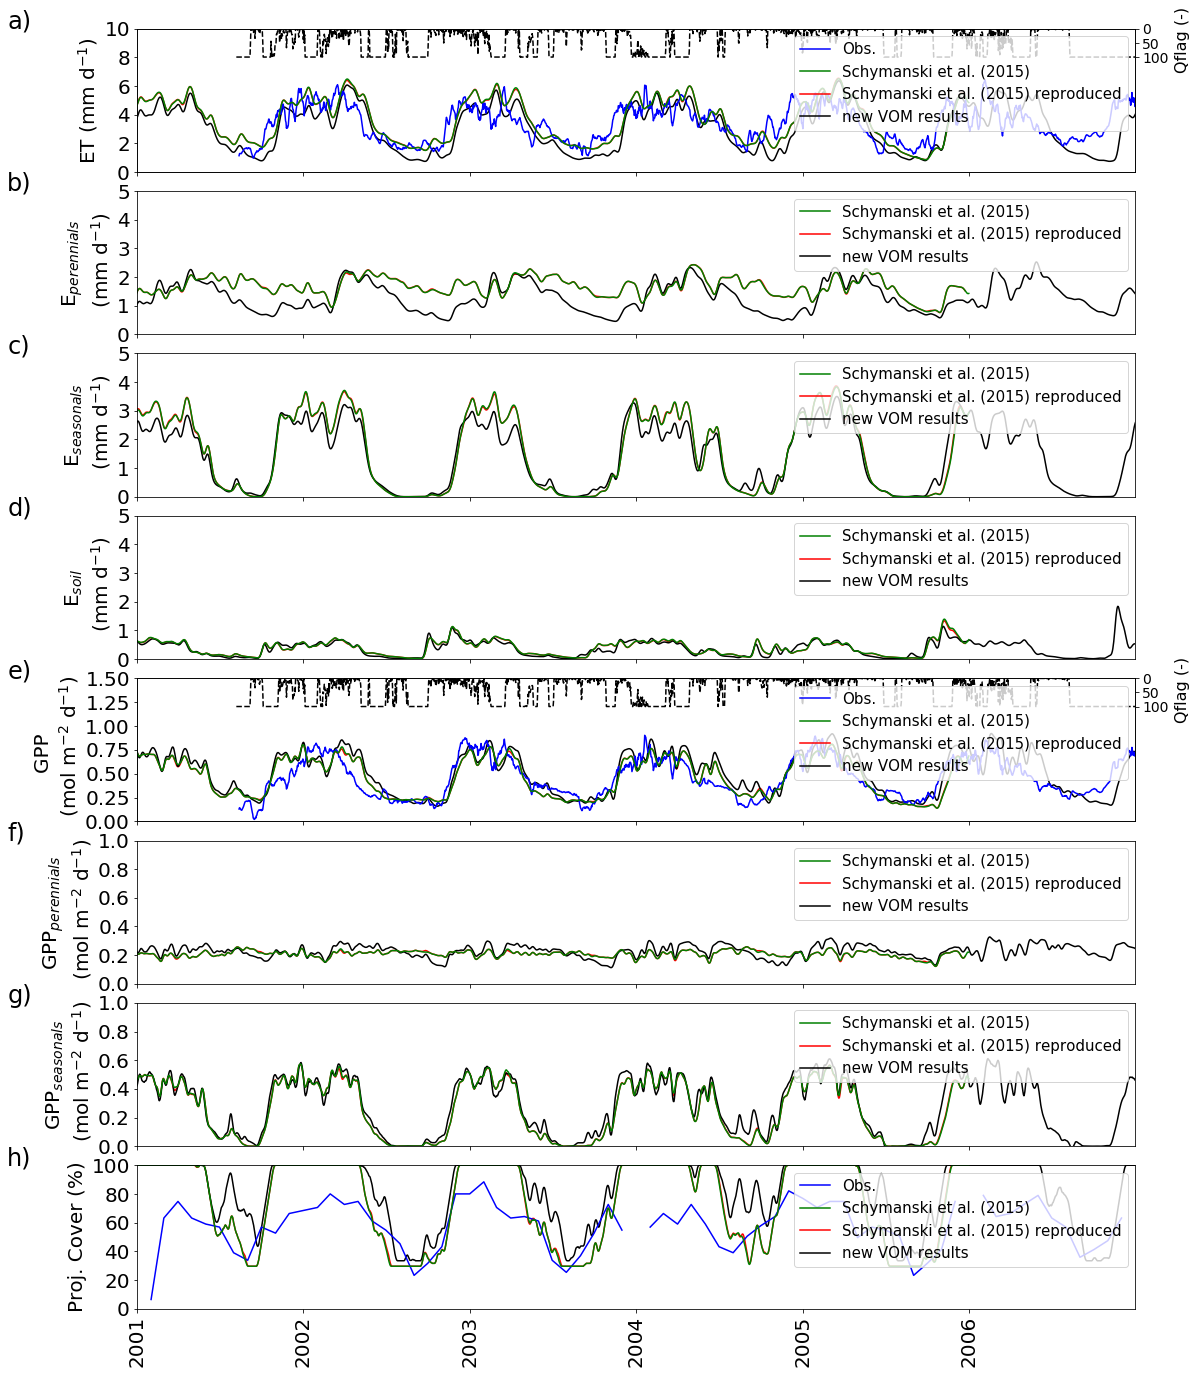

In [3]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015) reproduced" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20


**Figure S1.1.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) (green) and a reproduction of those results (red) based on the best run of the SCE-algorithm from Schymanski et al. (2015), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

These smoothed results are similar between the reproduced runs, and the original results of Schymanski et al. (2015), but there is a small a shift in time due to leap years, that were not accounted for by Schymanski et al. (2015). 

<Figure size 1280x800 with 0 Axes>

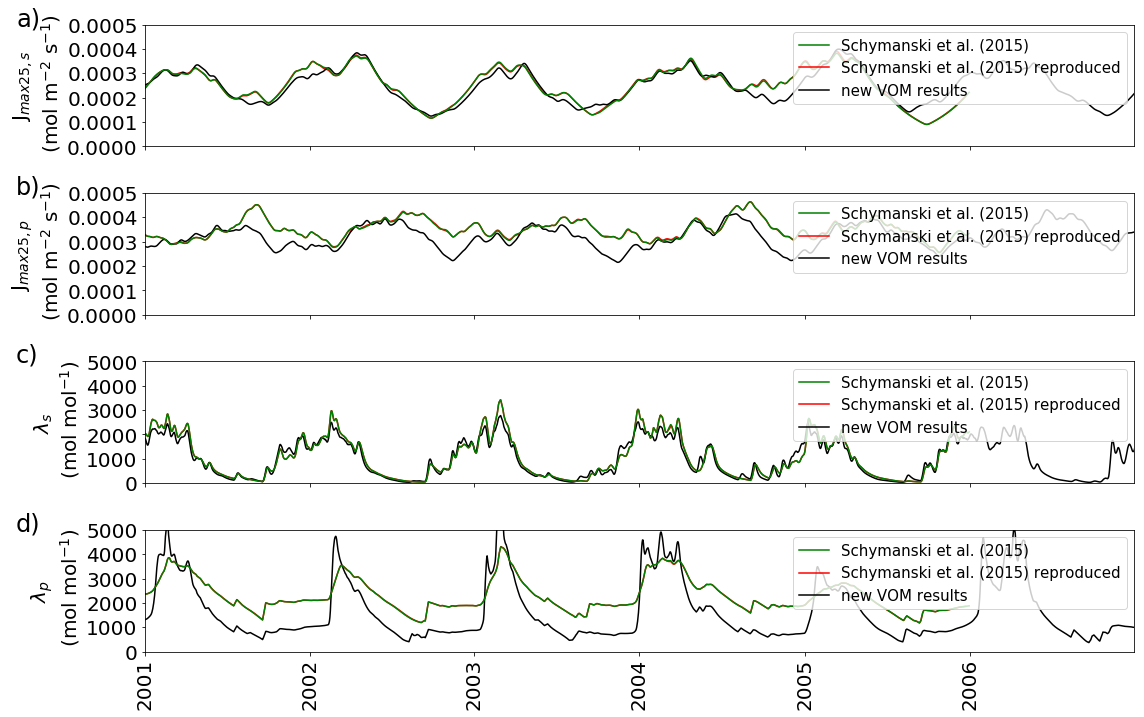

In [4]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015) reproduced" "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.2.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) (green) and a reproduction of those results (red) based on the best run of the SCE-algorithm from Schymanski et al. (2015), and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

These smoothed results are similar between the reproduced runs, and the original results of Schymanski et al. (2015), but there is a small a shift in time due to leap years, that were not accounted for by Schymanski et al. (2015). 

<Figure size 1280x1520 with 0 Axes>

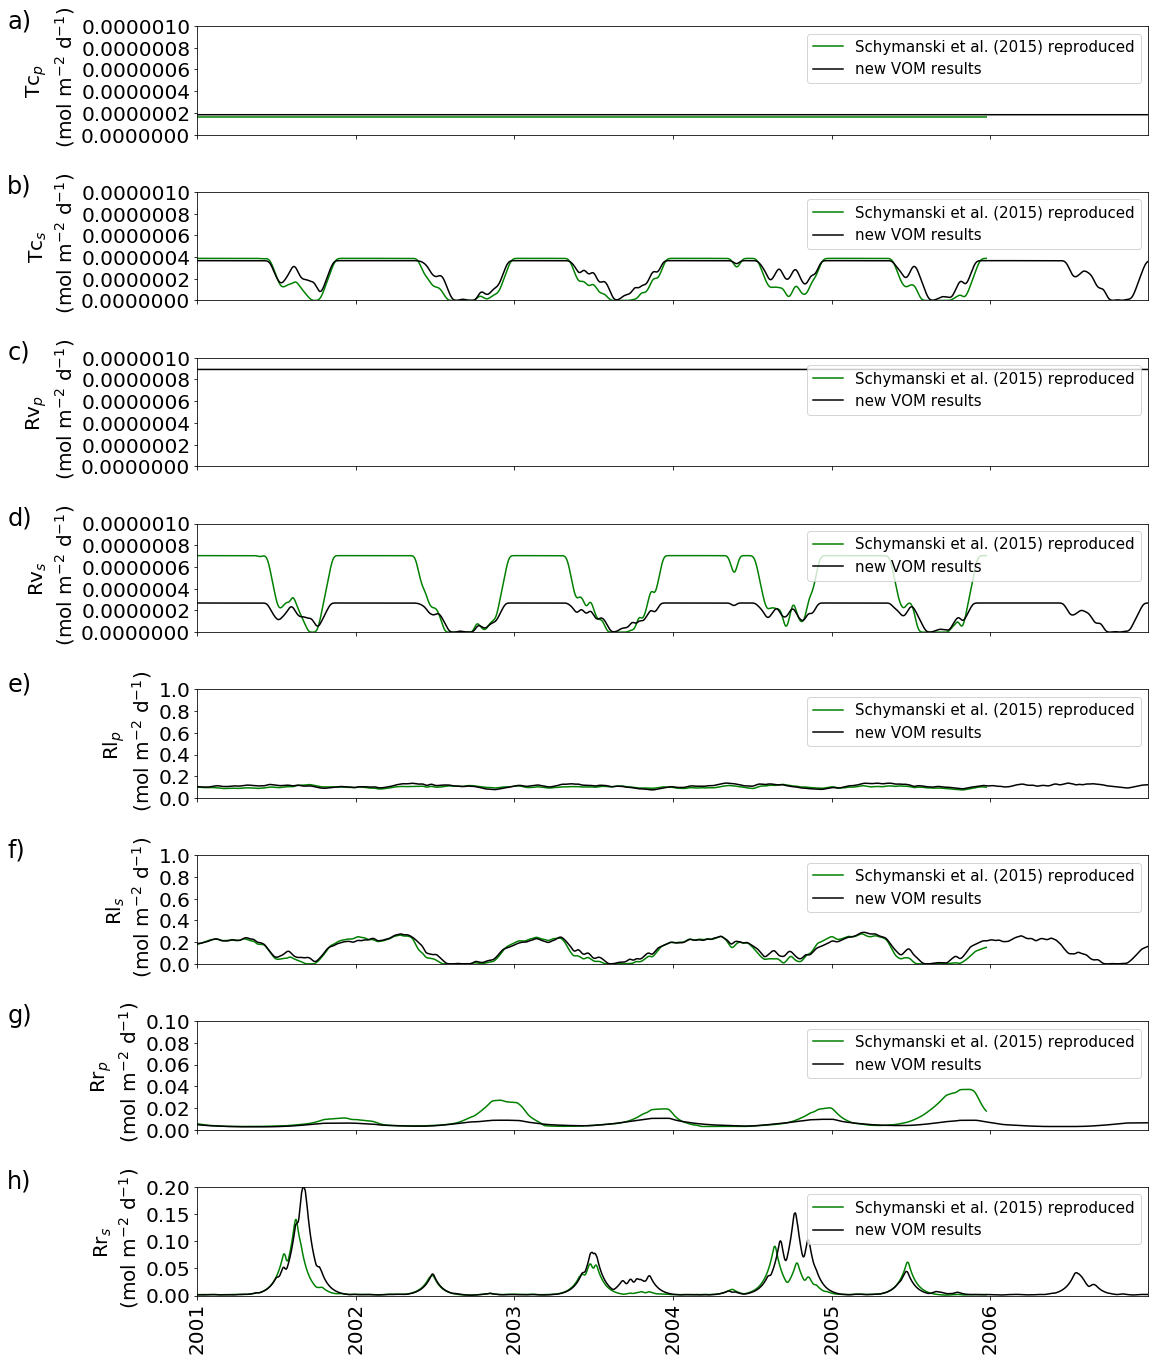

In [5]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "rrt" "rrg"   \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 0.1 0.2 \
--ymin 0 0 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green black gray \
--labels "Schymanski et al. (2015) reproduced" "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20


**Figure S1.3.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) (red) based on the best run of the SCE-algorithm from Schymanski et al. (2015), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown.

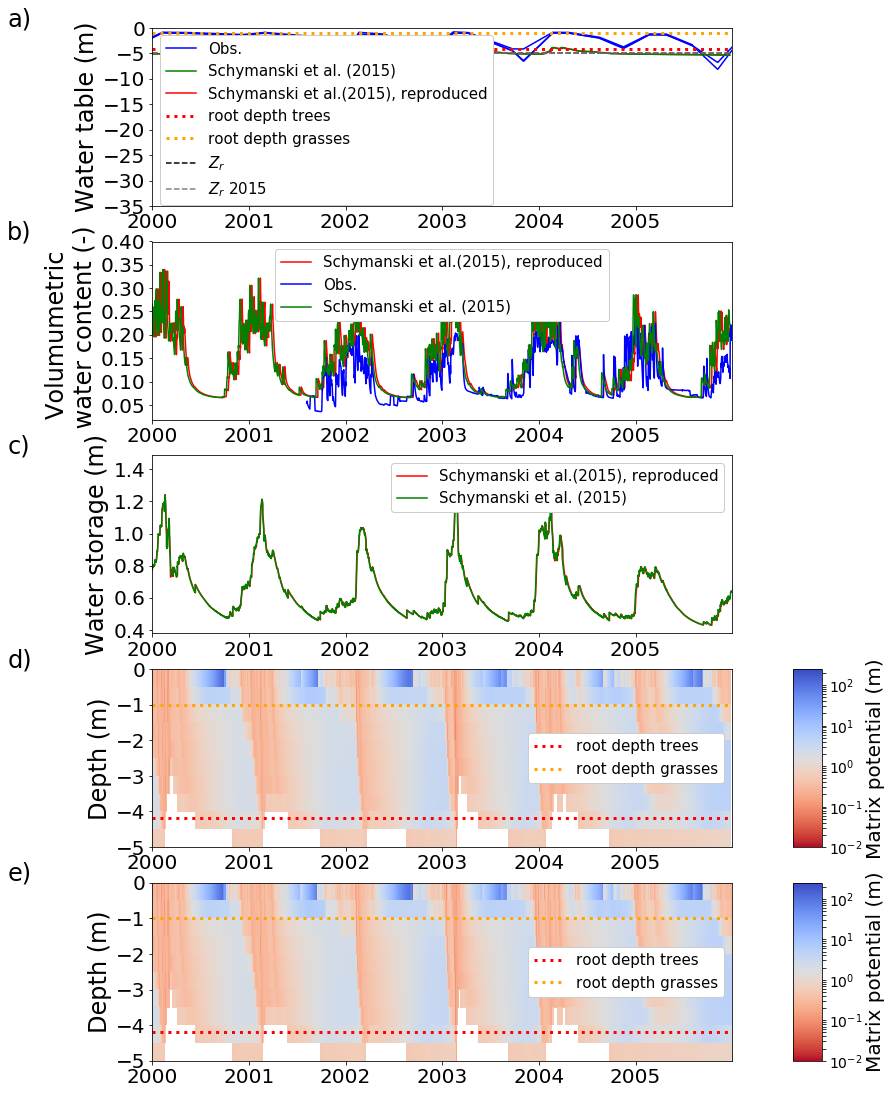

In [6]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red --i_delz 0.20 --i_cz 30 --i_zr 5 \
--pars ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015), reproduced" --xloc_title -0.25

**Figure S1.4.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

**Concluding remarks**

The results of Schymanski et al. (2015) were largely reproduced with a new version of the VOM, as shown in Figures S1.1-S1.4. Differences in the fluxes and other time series are neglible, and the new version of the VOM provides a good starting point of the new study.

## Reproducing the optimization
The vegetation properties are re-optimized with the same settings, and the inputs and parameter ranges kept the same as for the model runs by Schymanski et al. (2015). These simulations should therefore give rather similar results, but not exactly the same.

<Figure size 1280x1520 with 0 Axes>

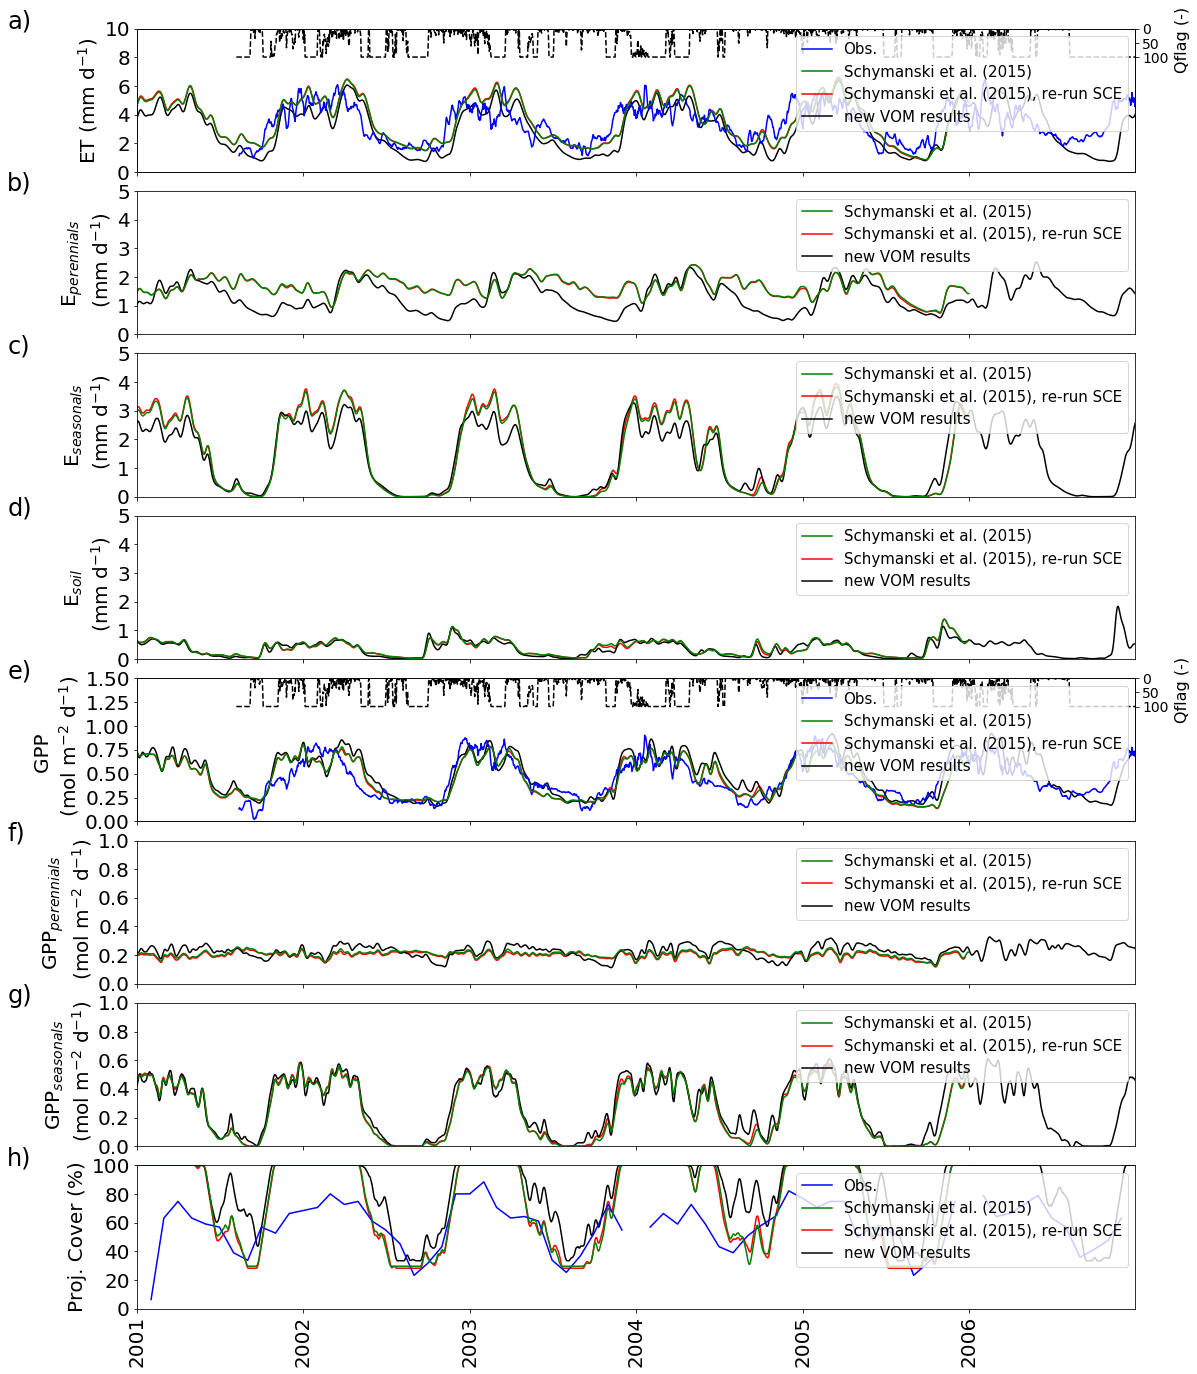

In [7]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015), re-run SCE" "new VOM results" "re-run SCE2" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20


**Figure S1.5.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) (green) and a reproduction of those results (red) based on re-running the SCE-algorithm, and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

Only minor differences occur for the different model runs, with the biggest differences for the vegetation cover.

<Figure size 1280x800 with 0 Axes>

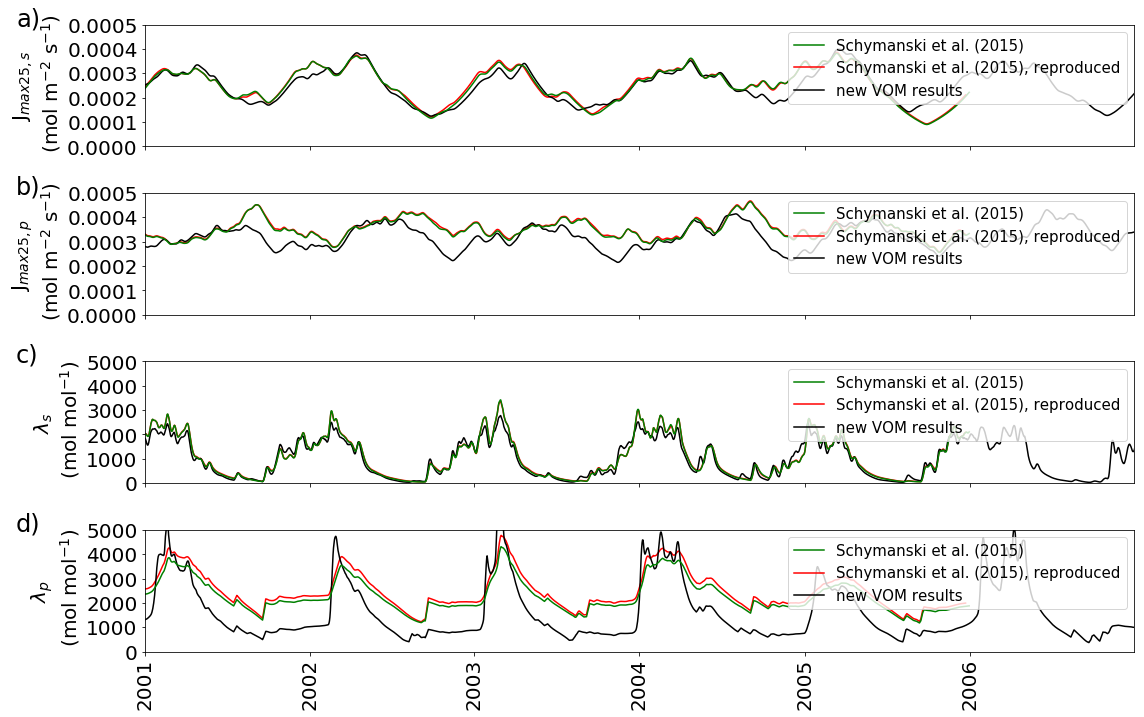

In [8]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015), reproduced" "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.6.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) (green) and a reproduction of those results (red) based on re-running the SCE-algorithm, and the new VOM modelling results, and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

Results are similar between the reproduced runs, and the original results of Schymanski et al. (2015), but the values for $\lambda_p$ are slightly increased for the new optimization.

<Figure size 1280x1520 with 0 Axes>

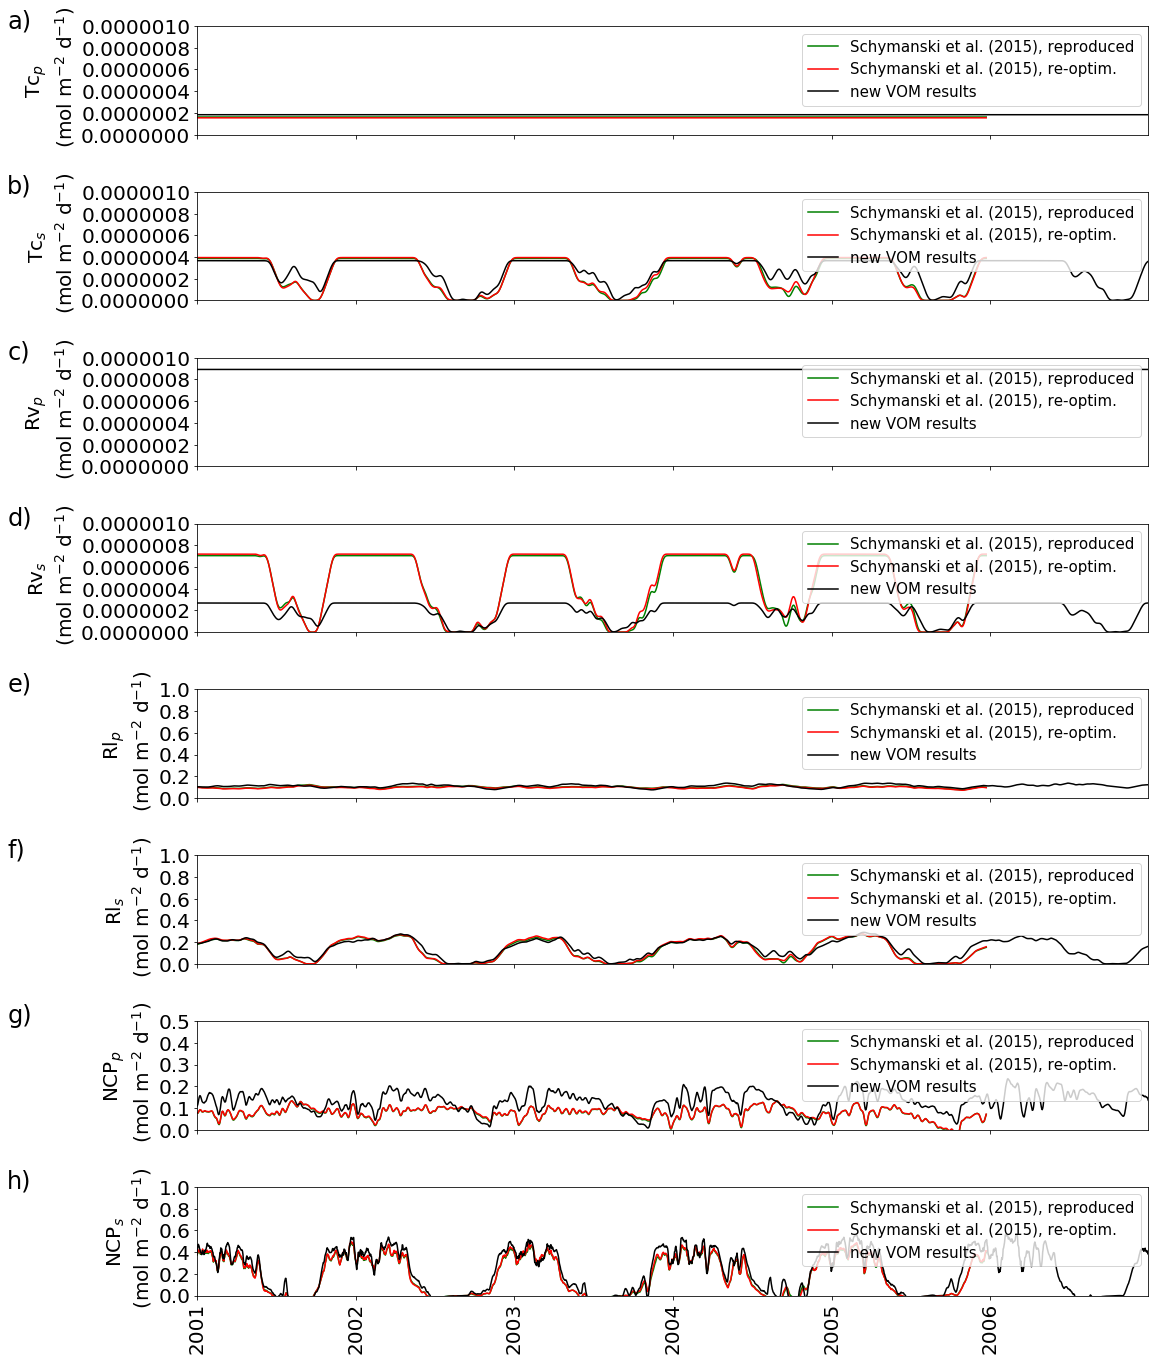

In [9]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 0.5 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5  --legend  \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al. (2015), reproduced"  "Schymanski et al. (2015), re-optim."  "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.7.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) (green) based on re-running the SCE-algorithm, and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. The differences between the reproduced results and the results of the re-run optimization remain rather small.

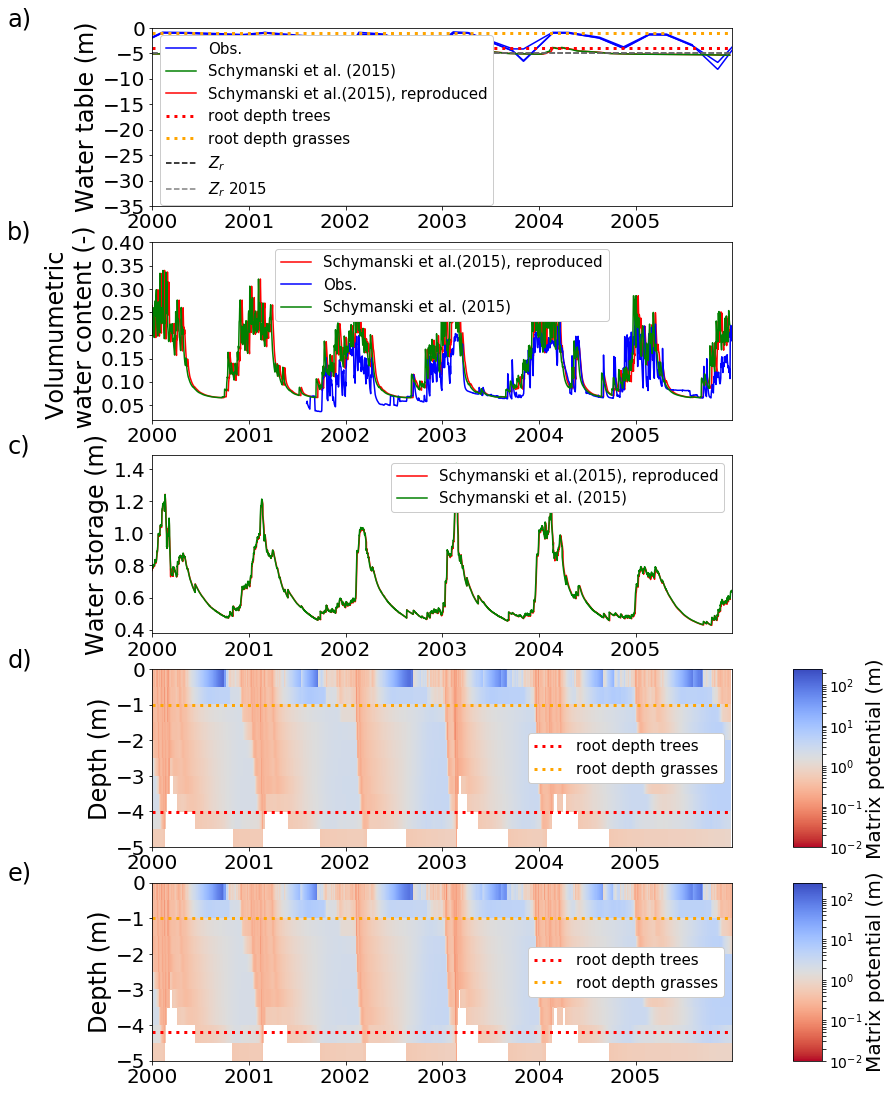

In [10]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red  \
--pars ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015), reproduced" --xloc_title -0.25

**Figure S1.8.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results (based on re-running the SCE-algorithm) of Schymanski et al. (2015) in red , the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

The differences are also here rather small between the original results of Schymanski et al. (2015), and the results of the re-run optimization.

**Concluding remarks**

The results of Schymanski et al. (2015) were also largely reproduced with a new version of the VOM and re-running the optimization with the same settings as Schymanski et al. (2015), as shown in Figures S1.5-S1.8. Therefore, the convergence of the SCE-algorithm towards similar values as Schymanski et al. (2015) also confirms that the new version of the VOM provides a good starting point of the new study.

## Change of modelling period
The model runs of Schymanski et al. (2015) were run from 1976 untill 2005, whereas the new runs start from 1980 untill 2017. This should not lead to large differences in the results.


<Figure size 1280x1520 with 0 Axes>

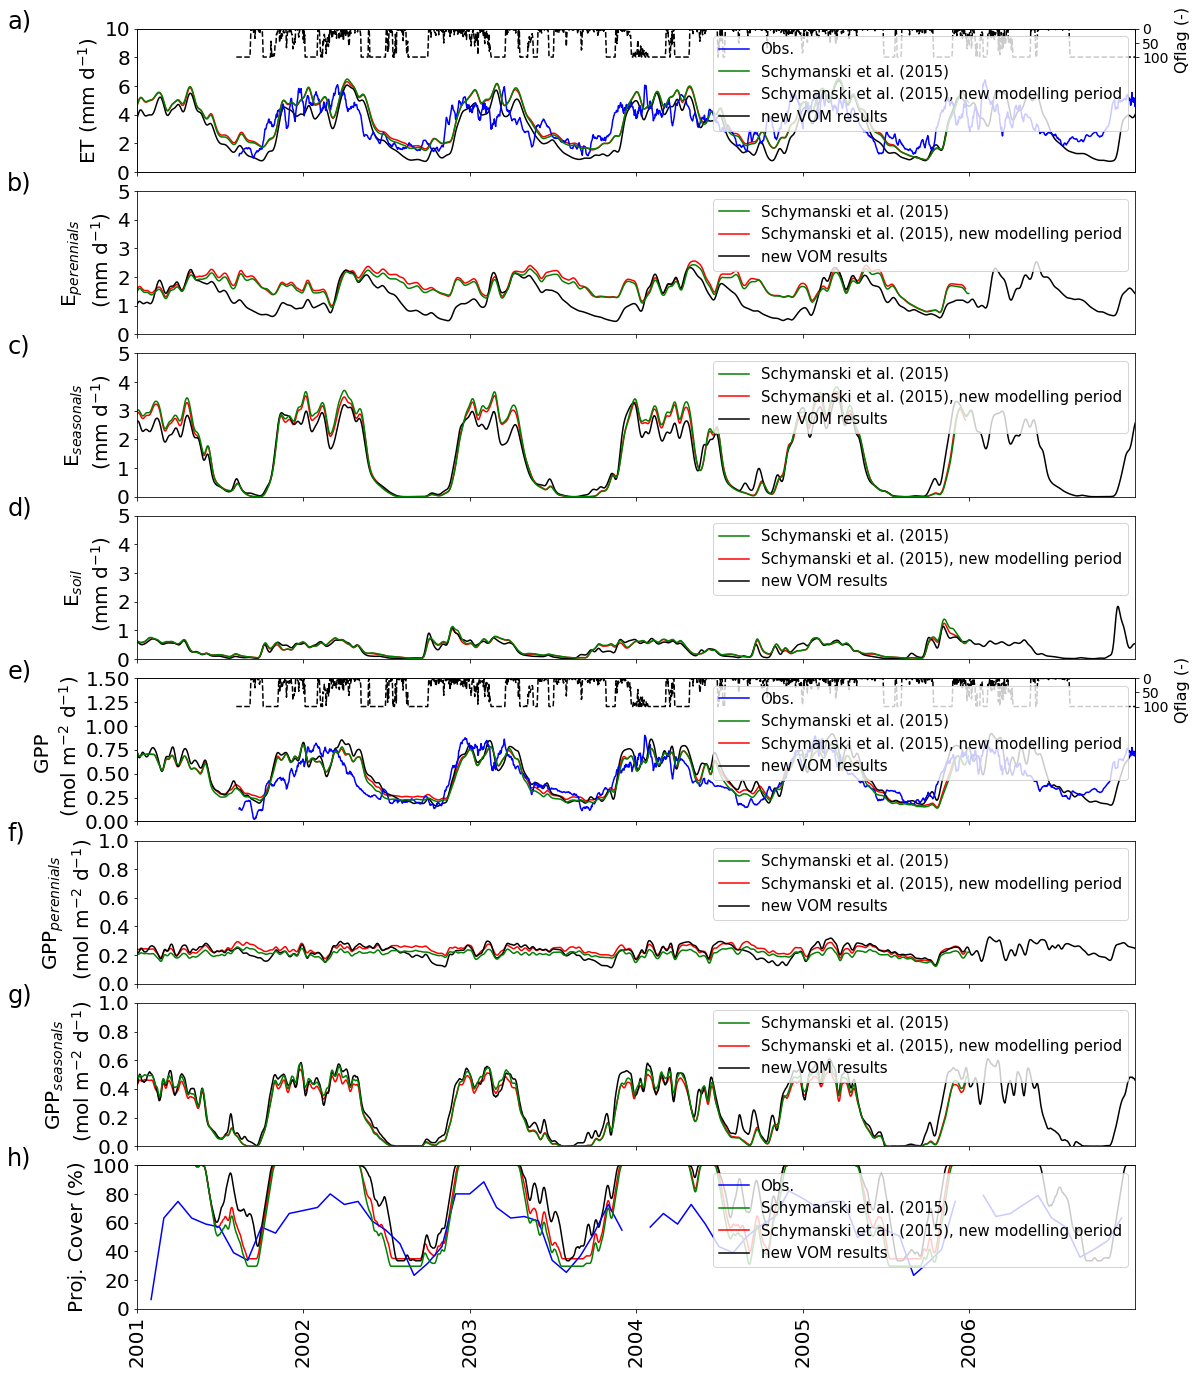

In [11]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015), new modelling period" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20

**Figure S1.9.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) (green) where the model period was set from 1976 untill 2005, and a reproduction of these results that start from 1980 untill 2017 (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

Results of total GPP and ET are similar between the reproduced runs and the original results of Schymanski et al. (2015). The GPP and transpiration for the perennials are slightly increased for the new modelling period, just as the vegetative cover.

<Figure size 1280x800 with 0 Axes>

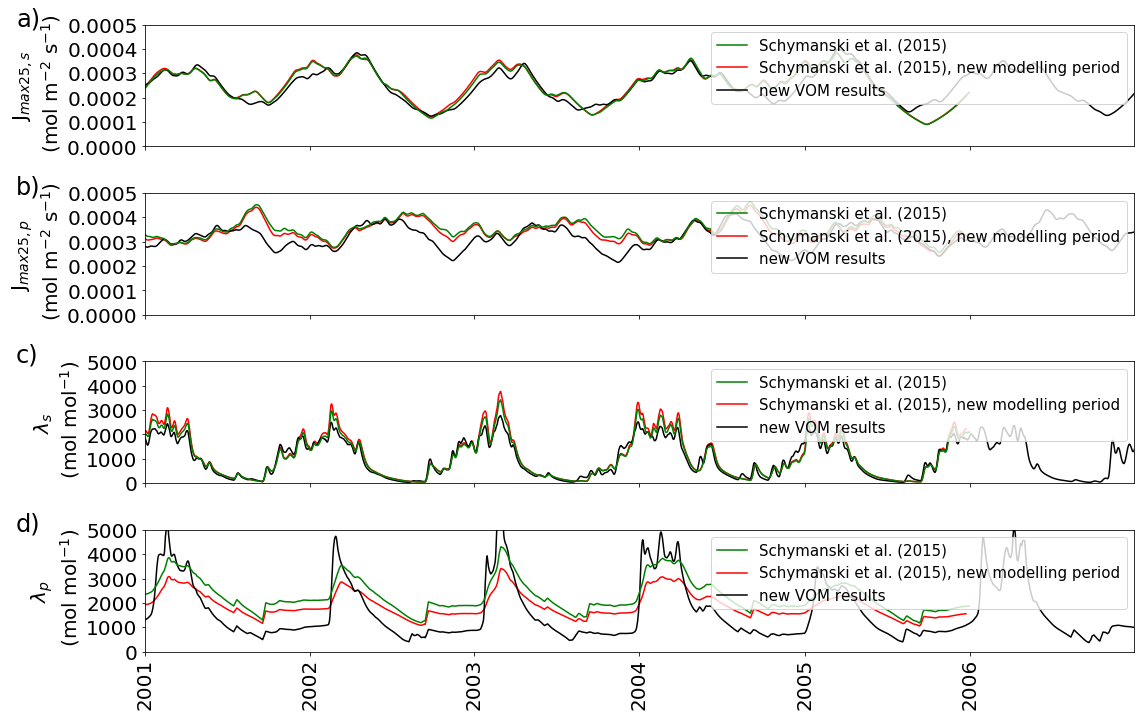

In [12]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015), new modelling period" "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.10.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) (green) where the model period was set from 1976 untill 2005, and a reproduction of these results that start from 1980 untill 2017 (red), and the new VOM modelling results, and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

Results are similar between the reproduced runs, and the original results of Schymanski et al. (2015), except for lower values for $\lambda_p$ and J$_{max25,p}$. 

<Figure size 1280x1520 with 0 Axes>

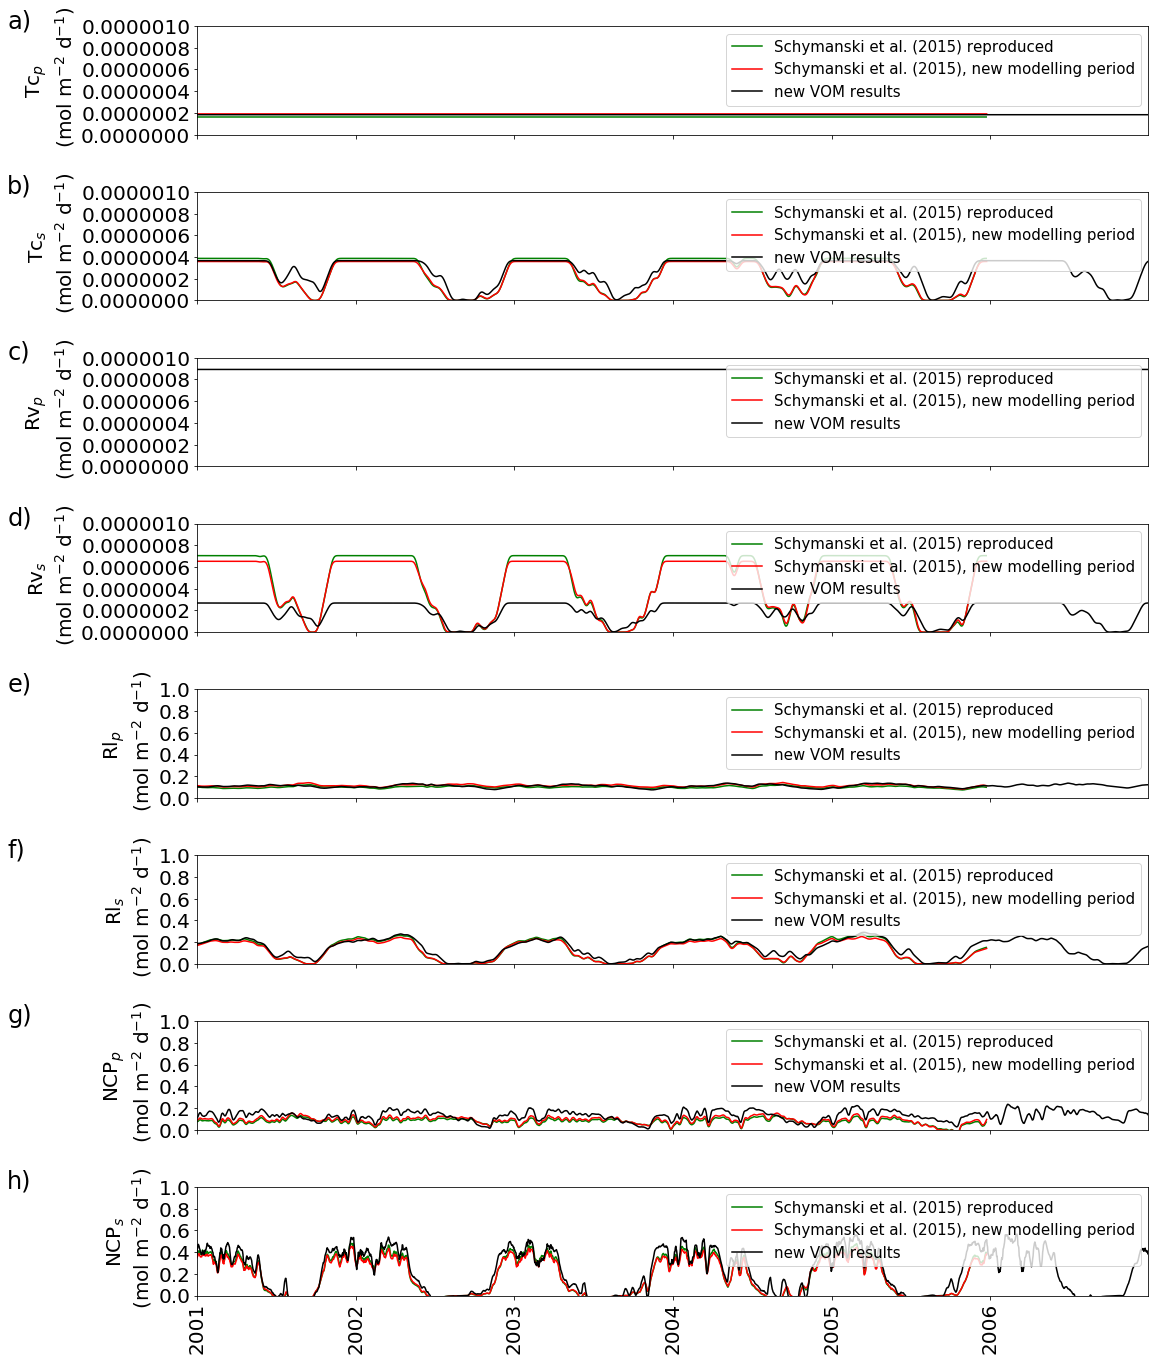

In [13]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5  --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al. (2015) reproduced"  "Schymanski et al. (2015), new modelling period"  "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.11.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) (green) where the model period was set from 1976 untill 2005, and a reproduction of these results that start from 1980 untill 2017 (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. The results remain similar, except for lower values of the water transport costs for seasonal grasses (Rv$_{s}$).

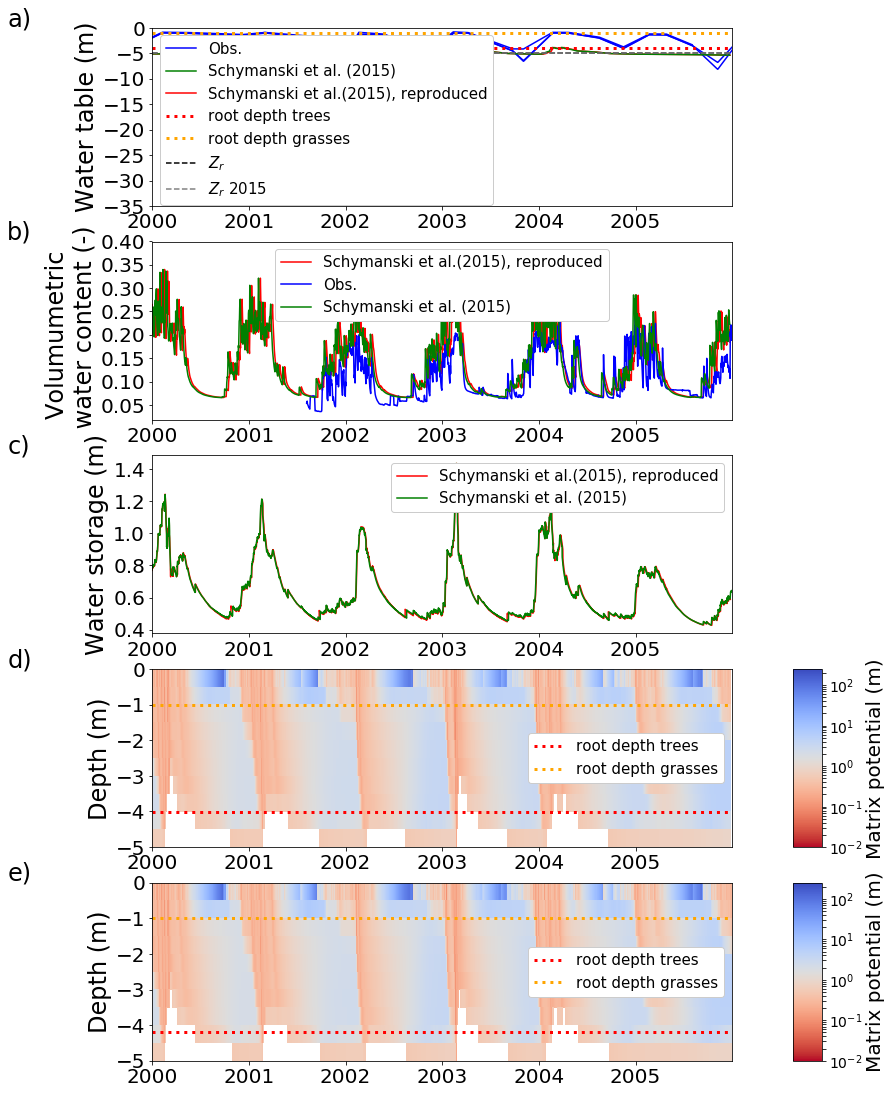

In [14]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red --i_delz 0.20 --i_cz 30 --i_zr 5 \
--pars ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015), reproduced" --xloc_title -0.25

**Figure S1.12.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results with a changed  model period from 1980 until 2017 in red , the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

The differences between the model runs with the model period and the original results of Schymanski et al. (2015) remain small. 

**Concluding remarks**

The changed modelling period (from 1976-2005 to 1980-2017) did not show strong differences in ET and GPP, but also other variables, such as carbon costs and electron transport capacities, remained similar as the the original results of Schymanski et al. (2015) (Figures S1.9-S1.12). Therefore, we can conclude that the new modelling period will not have a strong influence on the new results. 

## Change of atmospheric CO$_2$-values
The model runs of Schymanski et al. (2015) used fixed atmospheric CO$_2$-values at 317 ppm, whereas the new runs use variable CO$_2$-levels based on data from the Mauna Loa records.

<Figure size 1280x1520 with 0 Axes>

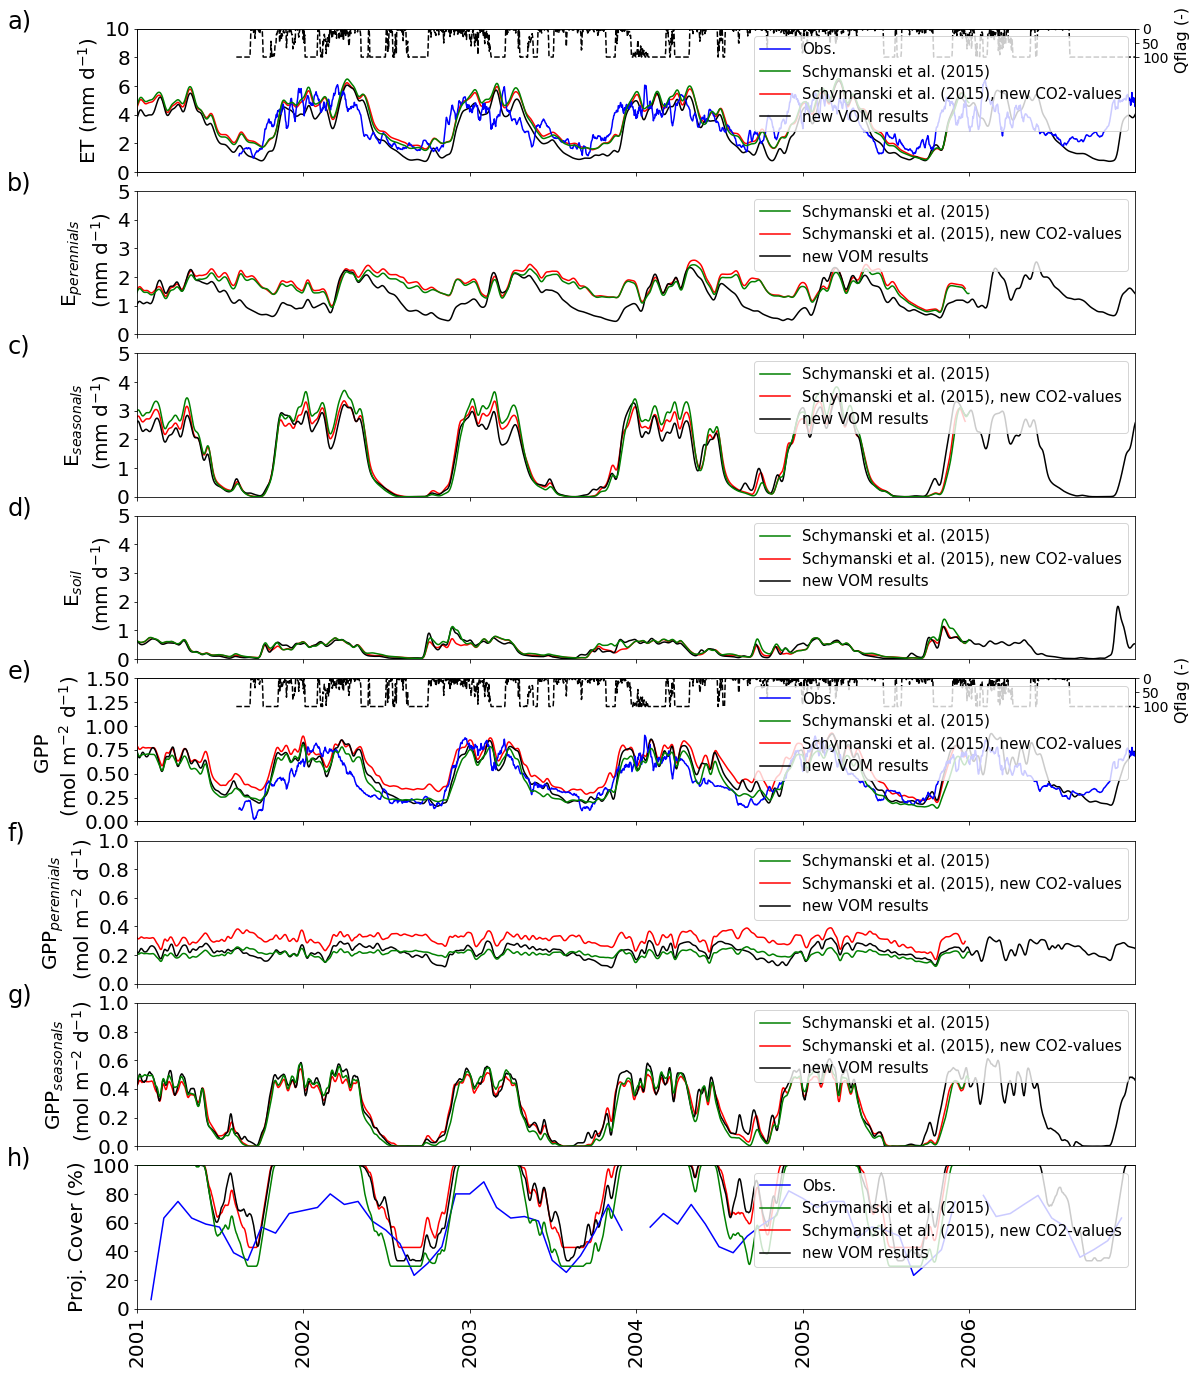

In [15]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015), new CO2-values"  "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20

**Figure S1.13.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) where atmospheric CO$_2$-values were fixed at 317ppm (green), and a reproduction of these results that start from 1980 untill 2017 (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

Results of total ET are similar between the runs with variable CO$_2$-levels, and the original results of Schymanski et al. (2015), but the GPP values increase with the new CO$_2$-values. This is mainly caused by higher GPP-values for the perennial trees. The transpiration remains rather similar between the two different model simulations, with a slight increase for the perennial vegetation and a slight decrease for the seasonal vegetation. The vegetation cover also increases due to the variable CO$_2$-levels. 


<Figure size 1280x800 with 0 Axes>

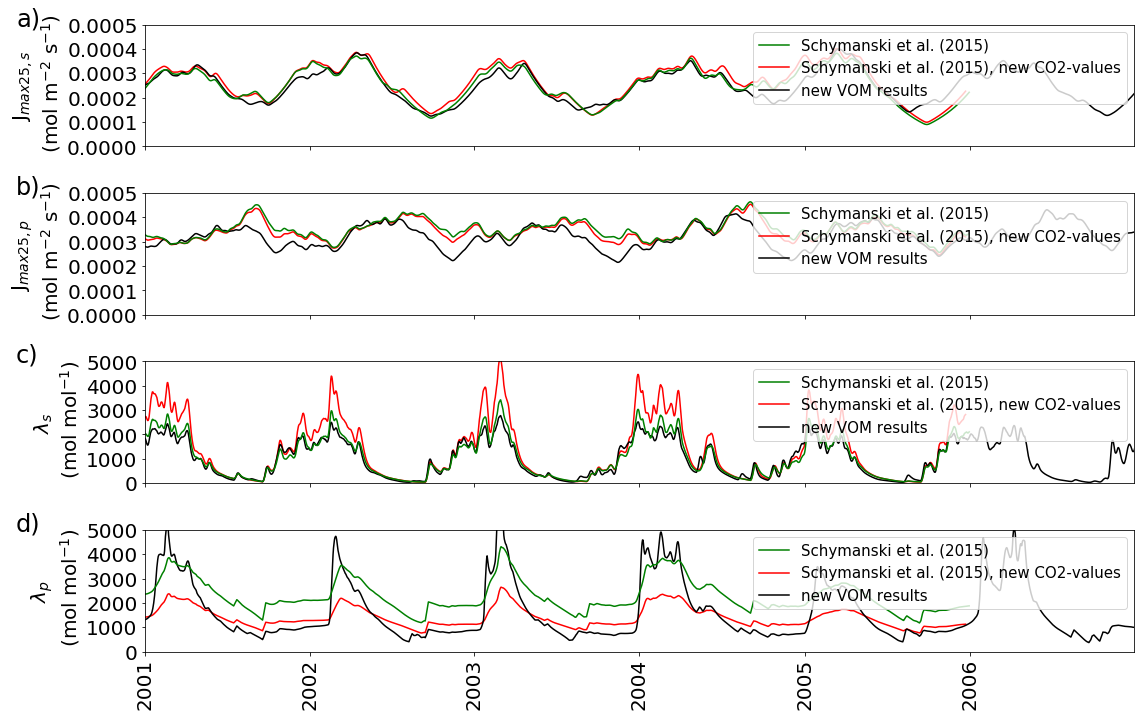

In [16]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015), new CO2-values"  "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.14.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) where atmospheric CO$_2$-values were fixed at 317ppm (green), and a reproduction of these results that start from 1980 untill 2017 (red), and the new VOM modelling results, and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

Results are similar between the reproduced runs, and the original results of Schymanski et al. (2015), but especially the values for $\lambda_p$ decrease for the new CO$_2$-values. In contrast, values for $\lambda_s$ increase during the wet season. 

<Figure size 1280x1520 with 0 Axes>

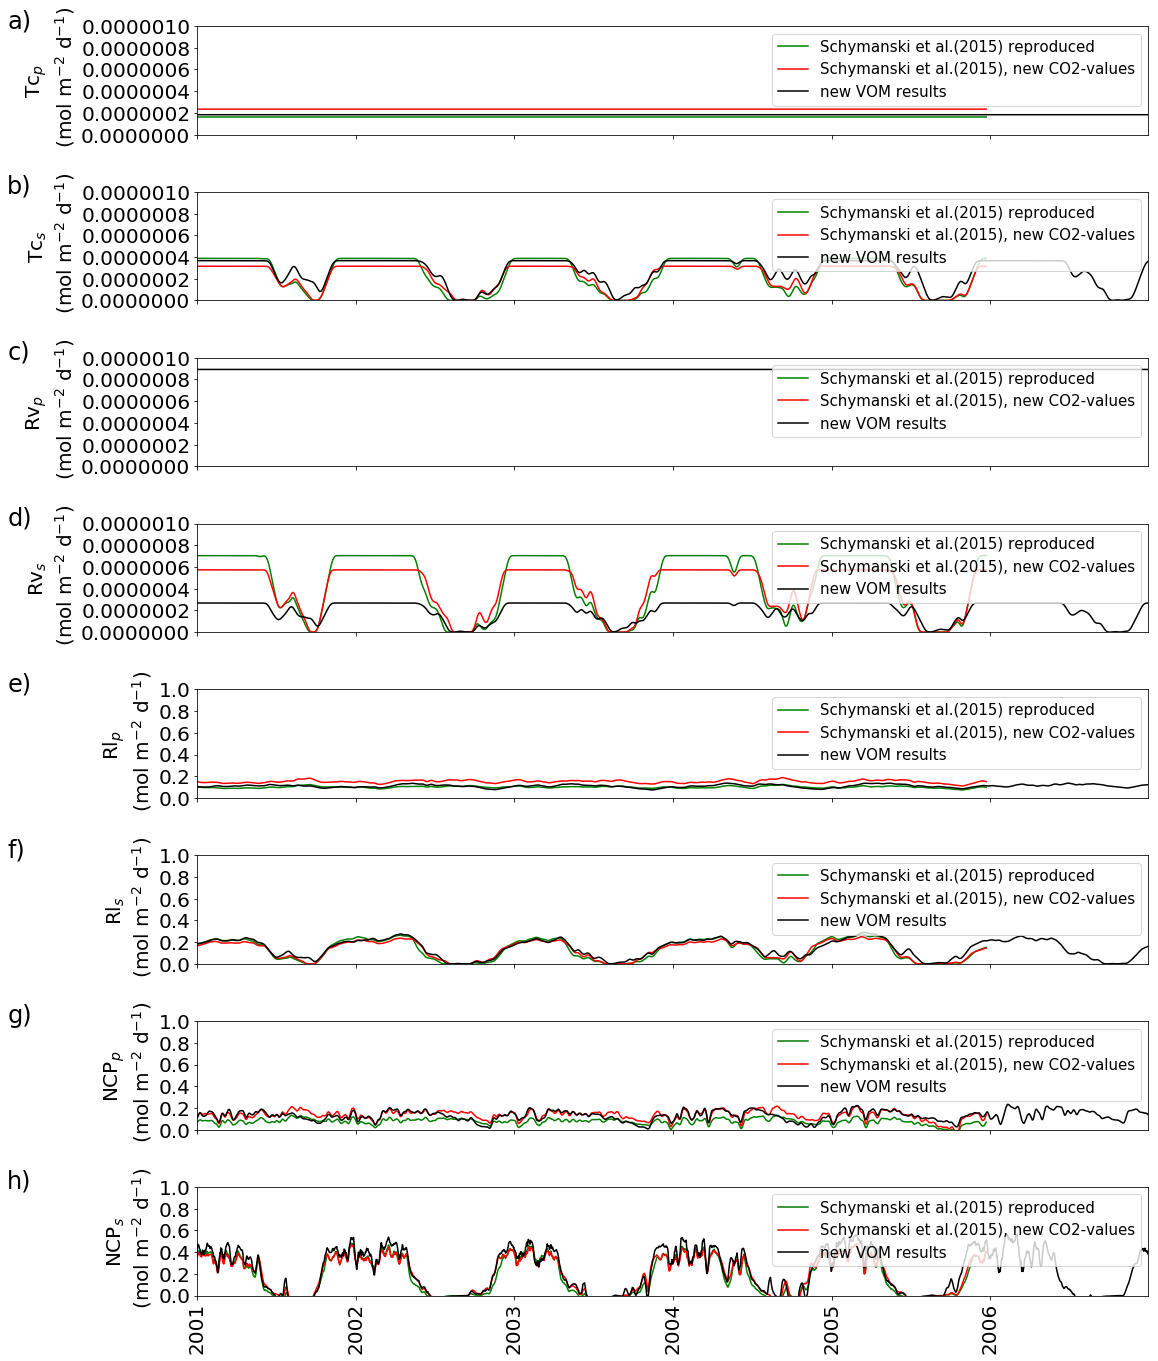

In [17]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006  \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5  --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015) reproduced"  "Schymanski et al.(2015), new CO2-values"  "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.15.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) where atmospheric CO$_2$-values were fixed at 317 ppm (green), and a reproduction of these results that start from 1980 untill 2017 (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. The cost for the water transport system for the seasonal vegetation is mainly reduced (Rv$_{s}$), but the perennial foliage turnover costs (Tc$_{p}$) and leaf respiration (Rl$_p$) are sligtly increased. Eventually, the NCP for the perennials is higher. 

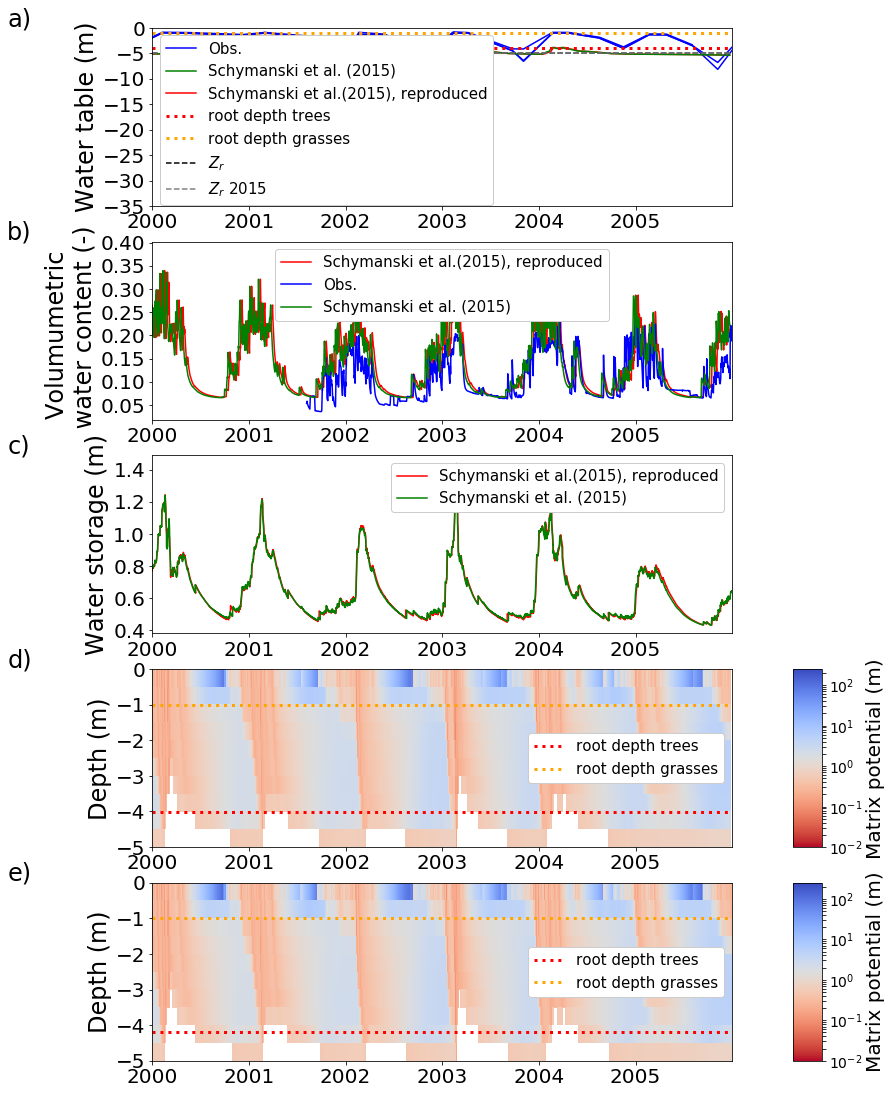

In [18]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red --i_delz 0.20 --i_cz 30 --i_zr 5 \
--pars ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015), reproduced" --xloc_title -0.25

**Figure S1.16.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results with variable CO$_2$-levels (red), the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the current model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

The differences here are rather small and are neglible. 


**Concluding remarks**

The new, variable CO$_2$-levels lead to higher values of GPP for especially the perennial vegetation, but the transpiration stays rather similar (Figures S1.13-1.16). The vegetation cover also showed increased values, but the total evapo-transpiration stays similar. Therefore, the new CO$_2$-levels will have an affect on the results in comparison with the results of Schymanski et al. (2015), mainly in relation to GPP and vegetation cover.

## Change of soil layer thickness
The soil layer thickness was reduced from 0.5 m to 0.2 m for the new model runs. This should lead to rather similar results, except for numerical differences.


<Figure size 1280x1520 with 0 Axes>

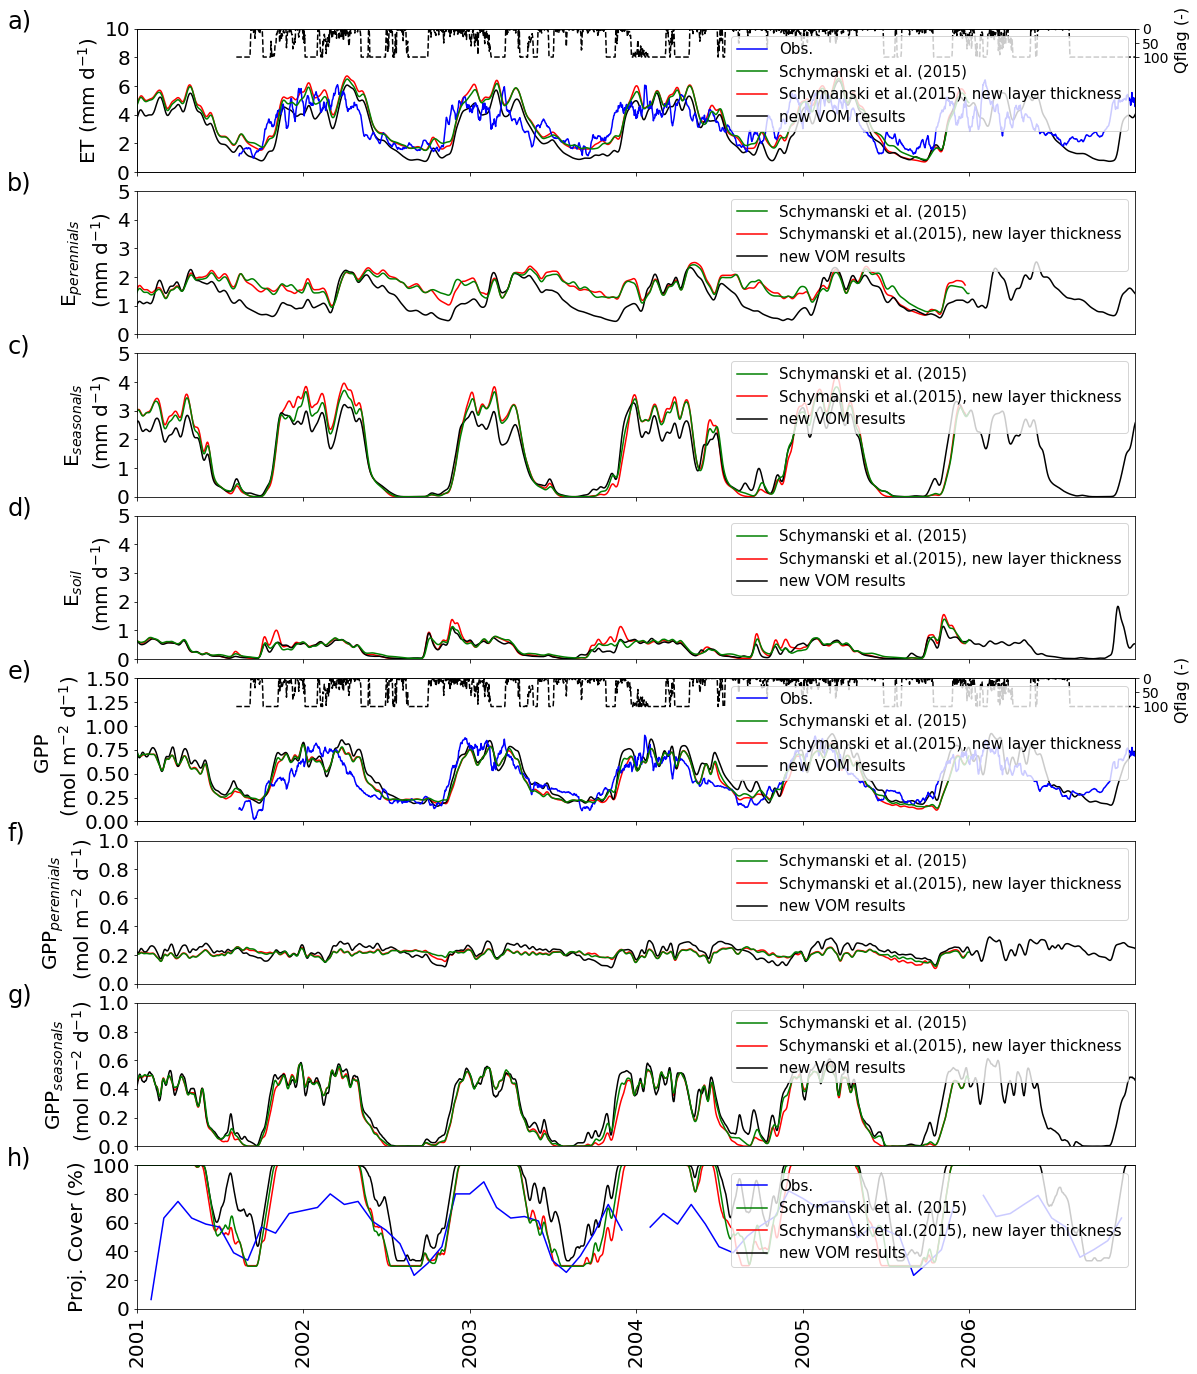

In [19]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015), new layer thickness" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20


**Figure S1.17.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) where soil layer thickness was set at 0.5 m (green), and a reproduction of these results that start from 1980 untill 2017 (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

There are small differences between the fluxes, but these are generally small. The soil evaporation is slightly higher during the wet season, which leads to small differences in the transpiration for the perennials and seasonals as well. The GPP is slightly lower for the new soil layer thickness.

<Figure size 1280x800 with 0 Axes>

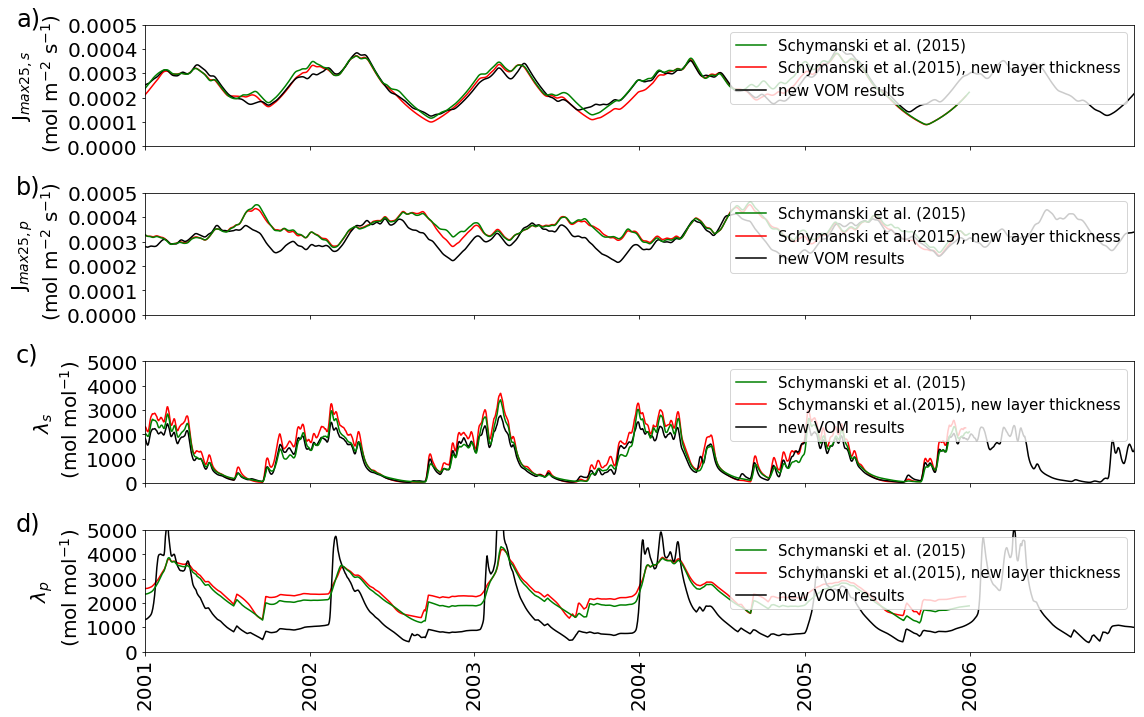

In [20]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015), new layer thickness" "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.18.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) where soil layer thickness was set at 0.5 m (green), and a reproduction of these results that use a layer thickness of 0.2m (red), and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

Results are similar between the reproduced runs, and the original results of Schymanski et al. (2015), except for slightly lower values for J$_{max25,s}$ and J$_{max25,p}$. The values for the slope $\lambda_p$ between assimilation and transpiration of the perennial vegetation is also increased with the new layer thickness in comparison with the original results.

<Figure size 1280x1520 with 0 Axes>

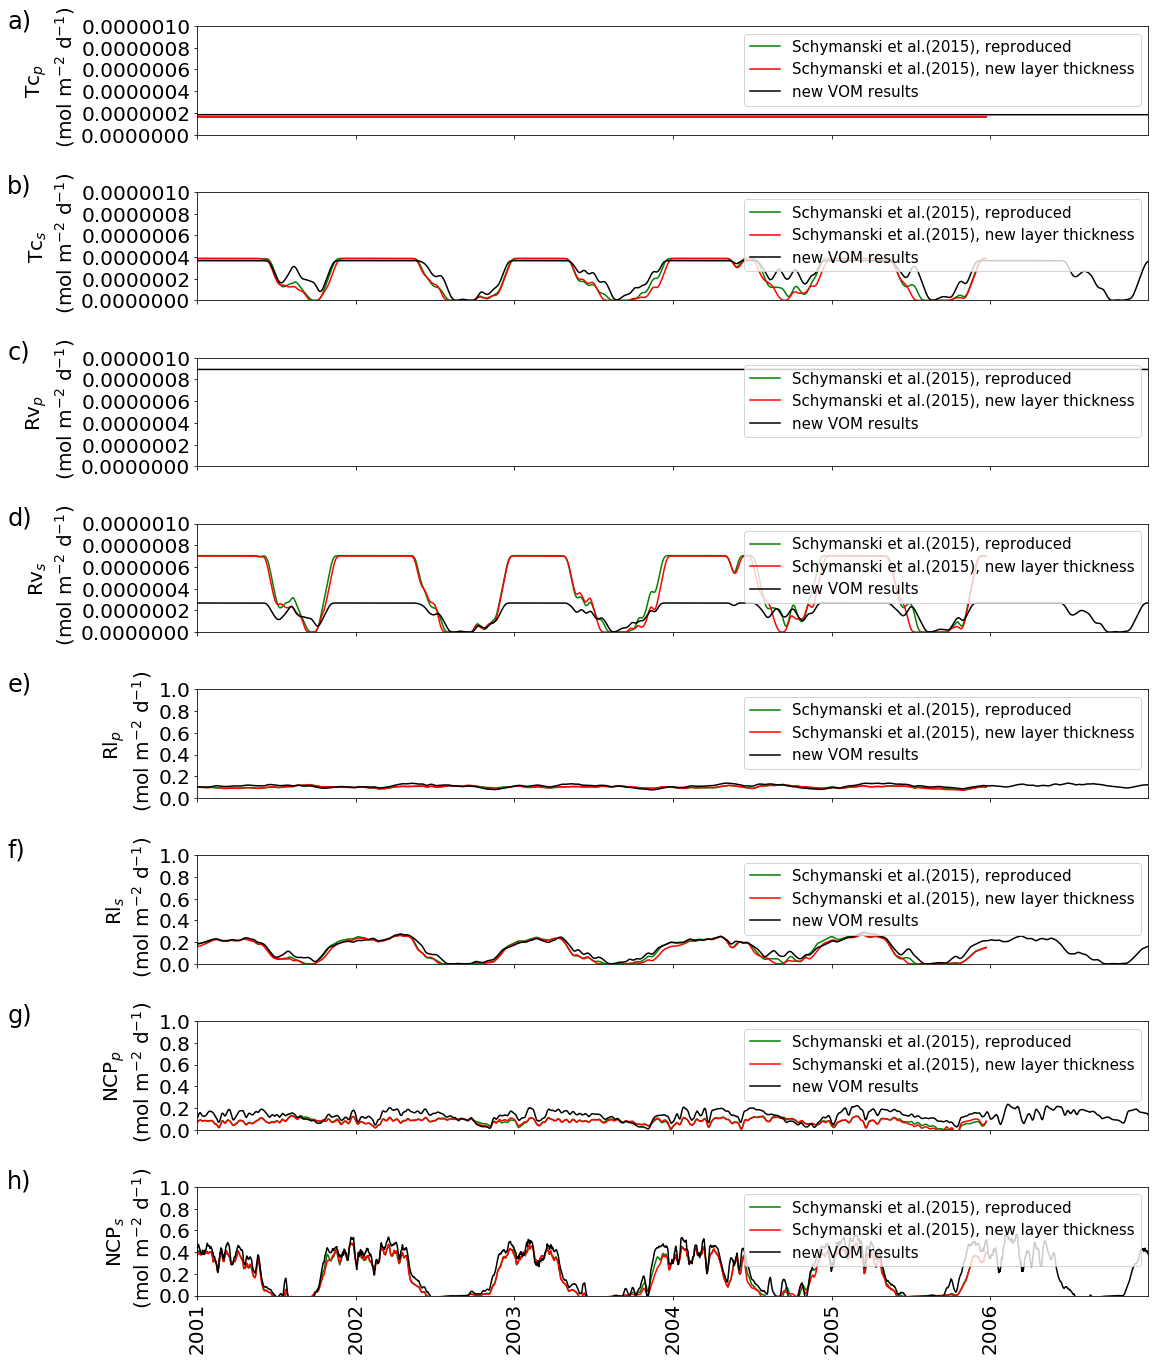

In [21]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5  --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015), reproduced"  "Schymanski et al.(2015), new layer thickness"  "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.19.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) where atmospheric CO$_2$-values were fixed at 317ppm (green), where soil layer thickness was set at 0.5 m (green), and a reproduction of these results that use a layer thickness of 0.2 m (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. The differences between the two model simulations are rather negligible.

In [ ]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red --i_delz 0.20 --i_cz 30 --i_zr 5 \
--pars ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.2 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015), reproduced" --xloc_title -0.25 

**Figure S1.20.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results with a soil layer thickness of 0.2 m (red), the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

The results between the two model simulations are small, except for the water storage in the upper 5 m that is slightly increased. 


**Concluding remarks**

The new soil layer thickness of 0.2 m does not lead to large differences (Figures S1.17-1.20). The largest influence of the new soil layer thickness is on soil evaporation at the end of the wet season, which also leads to small differences in the other evaporative fluxes. 

## Change of atmosperic pressures
The atmosperic pressure was fixed by Schymanski et al. (2015) at 1013.25 hPa, the new runs use variable levels obtained from the SILO meteorological data. This should not lead to large differences. 


In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015), new atm.press." "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20

**Figure S1.21.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015), where atmosperic pressure was fixed at 1013.25 hPa (green) , and a reproduction of these results that use variable levels obtained from the SILO meteorological data  (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

Results of total GPP and ET are similar between the reproduced runs. The transpiration for the perennials and the seasonals remain also rather similar, but the GPP for the perennials is slightly increased. The projective cover is also slightly higher compared to the original simulations.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015), new atm.press." "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.22.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015), where atmosperic pressure was fixed at 1013.25 hPa (green) , and a reproduction of these results that use variable levels obtained from the SILO meteorological data  (red), and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

Results are similar between the reproduced runs, and the original results of Schymanski et al. (2015). The values for the slope $\lambda_p$ between assimilation and transpiration of the perennial vegetation is slightly reduced, whereas the $\lambda_s$ is slightly increased.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015), reproduced"  "Schymanski et al.(2015), new atm.press."  "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.23.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) where atmospheric CO$_2$-values were fixed at 317ppm (green), where atmosperic pressure was fixed at 1013.25 hPa (green) , and a reproduction of these results that use variable levels obtained from the SILO meteorological data  (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. The values remain rather similar, except for the costs for the water transport system for the seasonal grasses (Rv$_{s}$), that are slightly reduced now. 

In [ ]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red --i_delz 0.20 --i_cz 30 --i_zr 5 \
--pars ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015), reproduced" --xloc_title -0.25

**Figure S1.24.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results with variable atmospheric pressures (red), the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

**Concluding remarks**

The new atmosperhic pressures only led to minor differences in the GPP, with increased values for the perennials, and therefore also in the carbon costs and benefits (Figures S1.21-S1.24). Nevertheless, the effects are small and will not have a strong influence on the results. 

## Optimizing rooting depths grasses
The grass rooting depths were fixed at 1.0 m by Schymanski et al. (2015), whereas the new runs optimize the rooting depth of grasses as well. 

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray orange \
--labels "Schymanski et al.(2015), optim. roots grass" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20

**Figure S1.25.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015), where grass rooting depths were fixed at 1.0 m (green) , and a reproduction of these results that optimize the rooting depth of grasses (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

Total GPP and ET reduced when roots were optimized, whereas the vegetation cover also decreased more strongly after the wet season. The perennial trees transpired less, whereas the transpiration of the seasonal grasses increased. The GPP for the perennials and the seasonals both reduced as well. 

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray orange\
--labels "Schymanski et al.(2015), optim. roots grass" "new VOM results" "bugfix" "re-run"\
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.26.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015), where grass rooting depths were fixed at 1.0 m (green), and a reproduction of these results that optimize the rooting depth of grasses (red), and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

The values for the slope $\lambda_p$ between assimilation and transpiration of the perennial vegetation reduced with the optimized grass roots, just as the electron transport capacities J$_{max25,p}$ and J$_{max25,s}$, in comparison with the original results.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 -0.4 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015) reproduced"  "Schymanski et al.(2015), optim. roots grass"  "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.27.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) where atmospheric CO$_2$-values were fixed at 317ppm (green), where grass rooting depths were fixed at 1.0 m (green), and a reproduction of these results that optimize the rooting depth of grasses (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. Most of the costs decrease when grasses are optimized, but most notably the costs for the water transport system.

In [ ]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red --i_delz 0.20 --i_cz 30 --i_zr 5 \
--pars ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al. (2015), reproduced" --xloc_title -0.25

**Figure S1.28.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results with optimized roots (red), the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

The water storage increases during the dry season, but decreases slightly during the wet season. The matrix potentials are also lower when grass roots are optimized.


**Concluding remarks**

Adding the grass rooting depths to the optimized vegetation properties leads to strong differences in the results (Figures S1.25-S1.28). Total GPP and ET both reduced when roots were optimized. At the same time, the perennial trees transpired less, whereas the transpiration of the seasonal grasses increased. This is rather surprising, as the rooting depths for both perennials and seasonals decreased, but the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses strongly increased as well, leading to a more efficient CO$_2$-uptake. 

## Cost factor for water transport capacity
The cost factor for water transport $c_{rv}$ was originally set at 1.0 $\mu mol m^{3} s^{-1}$, but here increased to  1.2 $\mu mol m^{3} s^{-1}$.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  new c$_{rv}$" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20


**Figure S1.29.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015), where the costfactor for water transport capacity was set at 1.0 $\mu$mol m$^{3}$ s$^{-1}$ (green), and a reproduction of these results that use 1.2 $\mu$mol m$^{3}$ s$^{-1}$  (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

A higher cost factor for the water transport system leads to lower GPP values and a lower vegetative cover. At the same time, the transpiration of the seasonal grasses increases, whereas the transpiration of the perennial trees decreases.  

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  new c$_{rv}$" "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.30.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015), where the costfactor for water transport capacity was set at 1.0 $\mu$ mol m$^{3}$ s$^{-1}$ (green) , and a reproduction of these results that use 1.2 $\mu$ mol m$^{3}$ s$^{-1}$  (red), and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

The values for the electron transport capacities J$_{max25,p}$ and J$_{max25,s}$ both reduce when the cost factor for water transport is increased. The slope $\lambda_p$ between assimilation and transpiration of the perennial vegetation is reduced as well, but the slope $\lambda_s$ increases.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015), reproduced"  "Schymanski et al.(2015), new c$_{rv}$"  "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.31.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015), where the costfactor for water transport capacity was set at 1.0 $\mu$ mol m$^{3}$ s$^{-1}$ (green) , and a reproduction of these results that use 1.2 $\mu$ mol m$^{3}$ s$^{-1}$  (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. Especially the costs for the water transport system differ between the model runs with an increased cost factor for the water transport c$_{rv}$  and the reproduced results of Schymanski et al. (2015), but also the foliage turnover costs differ. 

In [ ]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red --i_delz 0.20 --i_cz 30 --i_zr 5 \
--pars ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015), reproduced" --xloc_title -0.25

**Figure S1.32.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results increased cost factor for water transport (red), the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

The water storage and water potentials increase in comparison with the results of Schymanski et al. (2015). The increased costs lead to shallower roots and lower total evapo-transpiration, which leads to more water in the soil. 

**Concluding remarks**

Increasing the cost factor for water transport c$_{rv}$ has a strong influence on the fluxes and the carbon costs (Figures S1.29-S1.32). The increased carbon costs lead to a lower vegetation cover, which leads again to lower GPP-values for both the perennial trees and seasonal grasses. The total evapo-transpiration reduced, but the transpiration of the seasonal grasses increased slightly during the wet season. The daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses increased as well, leading to a more efficient CO$_2$-uptake. Eventually, wetter conditions remain as less water is taken up for transpiration. 

## Weatherdata
The meteorological forcing data was updated by a newer version from the Australian SILO. This included variable atmosperic pressure levels.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  new weatherdata" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20

**Figure S1.33.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) in green, and a reproduction of these results that use a new version of SILO-datadrill, including variable atmosperic levels  (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

The new weatherdata hardly leads to any differences, except for slightly reduced values of the transpiration of the seasonal vegetation. Minor differences in the vegetation cover can be found as well. 

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  new weatherdata" "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.34.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) in green, and a reproduction of these results that use a new version of SILO-datadrill, including variable atmosperic levels  (red), and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

The values for the slope $\lambda_p$ between assimilation and transpiration of the perennial vegetation is slighty reduced with the new weatherdata, in comparison with the original results, but the results remain rather similar again. 

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015) reproduced"  "Schymanski et al.(2015), new weatherdata"  "VOM 2020" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.35.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) in green, and a reproduction of these results that use a new version of SILO-datadrill, including variable atmosperic levels  (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. The results remain rather similar between the runs with the new weatherdata and the reproduced results of Schymanski et al. (2015).

In [ ]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red --i_delz 0.20 --i_cz 30 --i_zr 5 \
--pars ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015), reproduced" --xloc_title -0.25

**Figure S1.36.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results that use a new version of SILO-datadrill, including variable atmosperic levels (red), the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

**Concluding remarks**

The new weather data only had a minor effect on the results (Figures S1.33-1.36), and will therefore not have a big effect on the new modelling results. 

## New hydrology

The hydrological parameters were changed in order to have freely draining conditions. The soil parameters are kept the same as for Schymanski et al (2015).

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  hydrology" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20

**Figure S1.37.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) in green, and a reproduction of these results that use free draining hydrological parameters (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

The new hydrological parameterization leads to a strong decrease in the transpiration of the perennial vegetation, just as reduced values for the GPP of the perennial vegetation. 

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  hydrology" "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.38.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) in green, and a reproduction of these results that use free draining hydrological parameters (red), and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

The values for the slope $\lambda_p$ between assimilation and transpiration of the perennial vegetation are reduced with the new hydrological parameterization, just as the electron transport capacity J$_{max25,p}$, in comparison with the original results.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015), reproduced"  "Schymanski et al.(2015), new weather"  "VOM 2020" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.39.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) in green,  and a reproduction of these results that use free draining hydrological parameters (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. The results in terms of carbon costs remain rather similar between the runs with the new hydrology and the reproduced results of Schymanski et al. (2015).

In [ ]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red  \
--pars ../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 30 --i_zr 5 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al. (2015), reproduced" --xloc_title -0.25

**Figure S1.40.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results that use free draining hydrological parameters (red), the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

The groundwater tables are much deeper with new hydrological parameterization. However, storage in the upper 5 meters increases, just as matrix potentials around 5 meters depth.


**Concluding remarks**

The new hydrological parameterization affected especially the evapo-transpiration, that were lower in total, but especially for the perennial trees (Figures S1.37-S1.40). The GPP of the seasonal grasses remained rather similar, but the GPP for the perennial trees reduced as well. This relates to the deeper groundwater tables, and a quicker drainage of water. 

## New soil parameters

The soil column was now changed to a homogeneous soil column of sandy clay loam, with especially a lower saturated hydraulic conductivity.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  new soil" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20

**Figure S1.41.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) in green, and a reproduction of these results that use different, homogeneous soil parameters (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

The new soil parameterization leads to a decrease in perennial and seasonal transpiration, but an increase in soil evaporation. The GPP values for the perennial vegetation remains similar, but the GPP for the seasonal vegetation decreases and shows a delayed signal.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend  \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  new soil" "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.42.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) in green, and a reproduction of these results that use different, homogeneous soil parameters (red), and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

The values for the slope $\lambda_p$ between assimilation and transpiration of the perennial vegetation are reduced with the new soil parameterization, whereas the slope increases during the wet season for the seasonal vegetation. The electron transport capacities for both seasonal and perennial vegetation decrease after changing the soil parameterization.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015) reproduced"  "Schymanski et al.(2015), new soil"  "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.43.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) in green, and a reproduction of these results that use different, homogeneous soil parameters (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. The results in terms of carbon costs are slightly different for the grasses for the water transport system (Rv$_s$) and the foliage turnover costs (Tc$_s$).

In [ ]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red  \
--pars ../../data/VOM_output/additional_analyses/comp2015/11_soil/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.1 --i_thetas 0.39 --i_avg 5.9 --i_nvg 1.48 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015) reproduced" --xloc_title -0.25

**Figure S1.44.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results that use different, homogeneous soil parameters (red), the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

The volumetric water content and the water storage increased with the new soil parameterization, als matrix potentials showed increased values in the upper layers. 

**Concluding remarks**

The new soil parameterization led to higher soil evaporation and lower transpiration, as well as lower GPP values for the seasonal grasses (Figures S1.41-1.44). More water stays in the soil due to a higher resistance to flow, making more moisture available for soil evaporation, which can also be noted from the volumtric water content and the matrix potentials.  

## New Ksat
The saturated hydraulic conductivity was changed to a much smaller value (similar as for sandy clay loam), in order to assess the sensitivity to just this soil parameter.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  new K$_{sat}$" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20

**Figure S1.45.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) in green, and a reproduction of these results that use the same homogeneous soil parameters except for a decreases saturated hydraulic conductivity (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

The new soil saturated hydraulic conductivity leads to a decrease in especially the transpiration of the perennials, but also the seasonals. The GPP values for the perennial vegetation reduces as well, whereas the projective cover increases.


In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  new K$_{sat}$" "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.46.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) in green, and  a reproduction of these results that use the same homogeneous soil parameters except for a decreased saturated hydraulic conductivity (red), and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

The values for the slope $\lambda_p$ between assimilation and transpiration of the perennial vegetation are reduced with the new hydraulic conductivity, whereas the slope $\lambda_s$ stays similar for the seasonal vegetation. The electron transport capacities for perennial vegetation decreases as well after changing the hydraulic conductivity.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015), reproduced"  "Schymanski et al.(2015), new K$_{sat}$"  "VOM 2020" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.47.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) in green, and  a reproduction of these results that use the same homogeneous soil parameters except for a decreases saturated hydraulic conductivity (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. The results in terms of carbon costs remain rather similar, except for small changes in the costs for the seasonal vegetation. 

In [ ]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --colors red \
--pars ../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015), reproduced" --xloc_title -0.25

**Figure S1.48.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results that the same homogeneous soil parameters except for a decreases saturated hydraulic conductivity (red), the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

The groundwater, volumetric water content and water storage slightly increased due to the lower saturated conductivity. The differences in matrix potentials are however minor.


**Concluding remarks**

A lower saturated conductivity mainly affects the perennial trees, that have lower values of GPP and transpiration (Figures S1.45-S1.48), but also the seasonal grasses show reduced values for the transpiration. This relates to the deeper roots of the perennial trees, and the different hydraulic conductivity makes it harder to maintain a higher root water uptake.

## New soil profile and hydrology
A new soil profile was added in contrast to the homogeneous soil profile used by Schymanski et al. (2015). At the same time, hydrology was now set to be freely draining.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  new soil/hydrology" "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20

**Figure S1.49.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) in green, and a reproduction of these results that use a new soil and hydrological parameterization (red), and the new VOM modelling results (black), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

It can be noted that especially the transpiration of the perennial vegetation decreases, but also the GPP of the perennial vegetation. The projective cover also increases for the new set-up.


In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al.(2015),  new soil/hydrology" "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.50.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) in green, and a reproduction of these results that use a new soil and hydrological parameterization (red), and the new VOM modelling results (black), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

The values for the slope $\lambda_p$ between assimilation and transpiration of the perennial vegetation are reduced with the new soil parameterization, whereas the slope $\lambda_s$ stays similar for the seasonal vegetation. The electron transport capacities for both seasonal and perennial vegetation decreases after changing the soil and hydrological parameterization.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend  \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red black gray \
--labels "Schymanski et al.(2015), reproduced"  "Schymanski et al.(2015), new soil/hydrology"  "VOM 2020" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.51.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) in green, and a reproduction of these results that use a new soil and hydrological parameterization (red), and the new VOM modelling results (black), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown. The results in terms of carbon costs are slightly different for the grasses for the water system (Rv$_s$) and the foliage turnover costs (Tc$_s$).

In [ ]:
%run ../../src_py/plot_rootzone_states_2.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red  \
--pars ../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce/sce_lastbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.2 --i_cz 30 --i_zr 5  \
--soildata ../../data/VOM_soils/HowardSprings/soilprofile.par \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "2015 reproduced" --xloc_title -0.25

**Figure S1.52.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the reproduced results that use the same soil profile except for a decreases saturated hydraulic conductivity (red), the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the reproduced results of Schymanski et al. (2015) in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the reproduced results of Schymanski et al. (2015) (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the reproduced model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

The groundwater table is deeper for the new hydrological and soil parameterization. The water storage in the upper 5 meters increases as well as the matrix potentials. 

**Concluding remarks**

Changing the soil and hydrological parameterization leads to a decrease in GPP and transpiration for especially the perennial trees (Figures S1.49-S1.52), whereas the values for the grasses remain rather similar. The groudwater tables are much deeper, but water storage and matrix potentials increase.

# Comparative analysis

The effects of the changes are compared here. The starting points are therefore still the parameters and settings used by Schymanski et al. (2015). From there, one change is included at a time, to see the specific influence of each change. 

In [ ]:
#plot parameters

basin = ["HowardSprings", "AdelaideRiver", "DalyUncleared", "DryRiver", "SturtPlains"]
cases = ["1_benchmark_repr", "2_sce_check", "3_modeltime", 
         "4_co2_var", "5_sdelz" , "6_atm", "7_rgdepth", "8_cpcff",
        "9_weather", "10_hydro", "11_soil", "12_ksat", "13_soilprofile_hydro"]

cases_names = ["1_benchmark_repr", "re-run SCE", "Change model period", 
         "CO$_2$ to variable levels", "Change soil layer thickness" , "Variable atm.press,",
               "Optim. root depth grasses", "Increase c$_rv$",
        "Update weather", "New hydrology", "New soil", "New K$_sat$", 
               "New soils and hydrology"]

labels = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)"]

params2015 = np.loadtxt("../../data/VOM_output/additional_analyses/comp2015/" + 
             "/0_benchmark/finalbest.txt")

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
#fig, ((ax0, ax1, ax2, ax3, ax4, ax5, ax6) )  = plt.subplots(nrows=1, ncols=7, figsize=(16, 5)) 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15), sharex=True) 
ax = axes.flat
fig.delaxes(ax[7])

ax[0].plot([0,15], [params2015[0],params2015[0]], color="green", label = "Schymanski et al. (2015)" ) 
ax[1].plot([0,15], [params2015[1],params2015[1]], color="green",label = "Schymanski et al. (2015)" ) 
ax[2].plot([0,15], [params2015[2],params2015[2]], color="green",label = "Schymanski et al. (2015)" ) 
ax[3].plot([0,15], [params2015[3],params2015[3]], color="green",label = "Schymanski et al. (2015)" ) 
ax[4].plot([0,15], [params2015[4],params2015[4]], color="green",label = "Schymanski et al. (2015)" ) 
ax[5].plot([0,15], [params2015[5],params2015[5]], color="green",label = "Schymanski et al. (2015)" ) 
ax[6].plot([0,15], [params2015[7],params2015[7]], color="green",label = "Schymanski et al. (2015)" ) 

    
for icase in  range(1,len(cases)):  
    
    #loop over files and load
    try:
        params = np.loadtxt("../../work/additional_analyses/comp2015/" + 
             cases[icase] + "/best/input/pars.txt") #mm/d
    except OSError:
        print("../../work/" + 
             cases[icase] + "/freedrainage_cpcff1.0/best/input/pars.txt") #mm/d        
        
        
    iparam = 0
    for iplot in range(0,7):
        
        if(iparam == 6):
            iparam = 7
        ax[iplot].plot([icase], params[iparam], "r*" ,ms=10 ) 
        iparam = iparam +1
        
        
for iplot in range(0,8):
    ax[iplot].set_xlim( 0, len(cases)+1  )      
    ax[iplot].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax[iplot].text(-0.1, 1.05, labels[iplot], ha='left', va='center', transform=ax[iplot].transAxes, fontsize=20)

ax[0].set_ylabel(r"c$_{\lambda f,s}$  (mol mol$^-$$^1$  m$^-$$^1$)", size=16 )  
ax[1].set_ylabel(r"c$_{\lambda e,s}$  (-)", size=16 )  
ax[2].set_ylabel(r"c$_{\lambda f,p}$ (mol mol$^-$$^1$  m$^-$$^1$)", size=16 )
ax[3].set_ylabel(r"c$_{\lambda e,p}$ (-)", size=16 ) 
ax[4].set_ylabel(r"M$_A$  (-)", size=16 )  
ax[5].set_ylabel(r"y$_{r,p}$  (m)", size=16 )  
ax[6].set_ylabel(r"y$_{r,s}$ (m)", size=16 )  

ax[6].set_xticks( range(1,len(cases)) )  
ax[6].set_xticklabels( cases_names[1:], rotation=90 ) 

plt.setp(ax[5].get_xticklabels(), visible=True)
plt.setp(ax[5].get_xticklabels(), visible=True)

ax[5].set_xticks( range(1,len(cases)) )  
ax[5].set_xticklabels( cases_names[1:], rotation=90 ) 
ax[5].xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False)


ax[0].legend()

plt.tight_layout(h_pad=-10)
    
plt.show()


**Figure S1.53.** Optimal vegetation parameters for the different incremental changes compared to Schymanski et al.(2015) (green line), for a) and b) the two parameters $c_{\lambda f,s}$ and  $c_{\lambda e,s}$ effecting the water use for perennial vegetation, c) and d) the two parameters $c_{\lambda f,p}$ and $c_{\lambda e,p}$ effecting the water use for seasonal vegetation, e) vegetation cover of the perennial vegetation $M_{A,p}$, f) the rooting depth for the perennial vegetation $y_{r,p}$ and g) the rooting depth for the seasonal vegetation $y_{r,s}$. 

The rooting depths mainly change when the soils and hydrology are changed, as well as the cost factor for water transport c$_rv$. The vegetation cover M$_A$ is especially sensitive to the new variable CO$_2$-levels, that are generally higher for the most recent years. The water use strategy parameters  $c_{\lambda f,s}$, $c_{\lambda e,s}$ , $c_{\lambda f,p}$ and $c_{\lambda e,p}$ show also the highest sensitivity for changes in soil parameters and hydrology, but also to the addition of the grass root depths to the optimizable parameters. 

In [ ]:
%run ../../src_py/plot_meanannuals_vom.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "spgfcf" \
"jmax25t" "jmax25g" "lambdat" "lambdag" "rrt" "rrg" "tct" "tcg" \
"cpcct_d" "cpccg_d" "ncp_t" "ncp_g" \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 2000 1000 1000 300 250 150 150 1000 0.2 0.2 \
1000000 1500000 10 10 0.0002 0.0002 0.001 0.001 100 100 100\
--ymin 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  \
--pcobsdates ../../data/fPAR/dates_v5 --legend True \
--xloc_title -0.25 --yloc_title 1.1 --size_title 20 --moving_average 7  \
--ticklabels "Schymanski et al. (2015) reproduced" \
"re-run SCE" "Change model period" \
"CO$_2$ to variable levels" "Change soil layer thickness" "Variable atm.press" \
"Optim. root depth grasses"  "Increase c$_rv$" \
"Update weather" "New hydrology" "New soil" "New K$_{sat}$"  \
"New soils and hydrology" "New VOM runs"\
--figsize 16 25 --hpad 0 --sharex --labelsize 14 --label_pad 10 \
--yticksize 16


**Figure S1.54.** Annual values for the different (incremental) changes in comparison with Schymanski et al. (2015) (green line), with a) mean annual ET, b) mean annual transpiration perennials (trees), c) mean annual transpiration seasonals (grasses), d) mean annual soil evaporation, e) mean annual GPP, f) mean annual GPP perennials (trees), g) mean annual GPP seasonals (grasses), h) mean annual seepage face flow (Q_$sf$), i) the mean electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), j) the mean electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), k)  the mean daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, l) the mean daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees), m) the mean annual root respiration perennial trees (Rr$_p$), n) the mean annual root respiration seasonal grasses (Rr$_s$), o) the mean annual foliage turnover costs perennial trees (Tc$_{p}$), p) the mean annual foliage turnover costs seasonal grasses (Tc$_{s}$), q) the mean annual water transport costs for perennial trees (Rg$_{p}$), r) the mean annual water transport costs for seasonal grasses (Rg$_{s}$), s) mean annual net carbon profit for perennial trees (NCP$_p$), t) mean annual net carbon profit for seasonal grasses (NCP$_s$).

GPP and ET are mainly reduced after changes in the soil and hydrology parameterizations, as well as an increased cost factor for water transport c$_rv$. In contrast, using variable CO$_2$-levels leads to increased values of GPP. It can also be noted that especially $\lambda_s$ and the soil evaporation increase due to changes in the soil parameterizations. Optimizing the root depths for the grasses leads to lower costs in general, but also a reduction in the fluxes. 




# Resulting differences

Eventually, all implemented changes lead to differences in model results, that are assesed here.

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2001 -ye 2006  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "new VOM results" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20


**Figure S1.55.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) (green) and the new results that implemeted all changes (red), for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, and h) projective cover. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

These smoothed results are similar between the reproduced runs, and the original results of Schymanski et al. (2015), but there is a small a shift in time due to leap years, that were not accounted for by Schymanski et al. (2015). 

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "jmax25g" "jmax25t" "lambdag" "lambdat"  \
-ys 2001 -ye 2006 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--ymax 0.0005 0.0005 5000 5000  \
--ymin 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "new VOM results" \
--figsize 16 10 --hpad 2 --sharex --labelsize 20


**Figure S1.56.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between the results of Schymanski et al. (2015) (green) and the new results that implemented all changes (red), for a) the electron transport capacity at 25 $^o$C for seasonal grasses (J$_{max25,s}$), b) the electron transport capacity at 25 $^o$C for perennials trees (J$_{max25,p}$), d) transpiration seasonals (grasses), d)  the daily slope ($\lambda_s$) between assimilation and transpiration of the seasonal grasses, e) the daily slope ($\lambda_p$) between assimilation and transpiration of the perennials (trees). 

In [ ]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--var "tct" "tcg" "cpcct_d" "cpccg_d"  "rlt" "rlg"  "ncp_t" "ncp_g"  \
-ys 2001 -ye 2006 \
--ymax 0.000001 0.000001 0.000001 0.000001 1 1 1 1  \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --legend \
--xloc_title -0.2 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors green red \
--labels "Schymanski et al.(2015), reproduced"  "new VOM results" \
--figsize 16 19 --hpad 2 --sharex --labelsize 20

**Figure S1.57.** Comparison for Howard Springs from 2001-2006 (subset from 1980-2017) between a reproduction of the results of Schymanski et al. (2015) (green) based on the best run of the SCE-algorithm from Schymanski et al. (2015), and the new VOM modelling results that implemented all changes (red), for a) the foliage turnover costs perennial trees (Tc$_{p}$), b) the foliage turnover costs seasonal grasses (Tc$_{s}$), c) the water transport costs for perennial trees (Rv$_{p}$), d) the water transport costs for seasonal grasses (Rv$_{s}$), e) leaf respiration perennial trees (Rl$_p$), f)leaf respiration seasonal grasses (Rl$_s$), g) root respiration perennial trees (Rr$_p$), h) root respiration seasonal grasses (Rr$_s$), all smoothed with a moving average of 7 days, and h) projective cover. 

Note that the original results of Schymanski et al. (2015) are not shown, as these variables were not produced as outputs, but only the reproduced values are shown.

In [ ]:
%run ../../src_py/plot_rootzone_states_2.py \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--depth True -ys 2000 -ye 2005 \
--obs_gw ../../data/boreholes/RN030982.csv ../../data/boreholes/RN030983.csv ../../data/boreholes/RN030984.csv \
--obs_sm ../../data/DINGO_SWS/SWSCon_howard.txt --labels VOM --colors red --i_delz 0.20 --i_cz 30 --i_zr 5 \
--pars ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim -35 0 --title True \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10 --i_thetar 0.065 --i_thetas 0.41 --i_avg 7.5 --i_nvg 1.89 \
--su_hourly ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/sce_best/su_hourly.txt \
--su_hourly2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 12 19 --labels "Schymanski et al.(2015), reproduced" --xloc_title -0.25

**Figure S1.58.** Results for Howard Springs with a) groundwater depths, with dashed lines representing the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the ne VOM results in red, the results of Schymanski et al. (2015) in green, and observations of three different boreholes in the vicinity of the study site in blue (Government Northern Territory, Australia, 2018). The soil moisture saturation in the upper soil layer is shown for Howard Springs in b) with the new VOM results in red, the results of Schymanski et al. (2015) in green and soil moisture measurements at 5 cm depth at the flux tower sites in blue. The total water storage in the upper 5 m is shown in c) for the new VOM results (red) and the results of Schymanski et al. (2015) in green. The matrix water potentials are shown in d) for the current model runs of the VOM, whereas e) displays the matrix water potentials of Schymanski et al. (2015).

In [ ]:
%run ../../src_py/plot_water_retention_curve.py \
--pars ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--legend True --xloc_title -0.12 --size_title 24 --ylim 0 1000 --title True \
--i_cz2015 15 --i_zr2015 10 --i_thetar2015 0.065 --i_thetas2015 0.41 --i_avg2015 7.5 --i_nvg2015 1.89 \
--i_delz 0.5 --i_cz 15 --i_zr 10  \
--soildata ../../data/VOM_soils/HowardSprings/soilprofile.par \
--i_delz2015 0.5 --pars2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/finalbest.txt \
--title True --figsize 10 10 --labels "2015 reproduced" --xloc_title -0.25 --palette RdYlGn

**Figure S1.59**. Water retention curves at Howard Springs for the current VOM-results in red, and the results of Schymanski et al. (2009) in green. Note that multiple red lines are shown due to the different soil parameterizations per soil layer in the current model runs, whereas Schymanski et al. (2009) used one soil parameterization for all soil layers. The upper soil layers have however the same soil parameters, leading to the curves to overlap (left red and dashed green).